# Exp 3

In [ ]:
from datasets import load_dataset

# Load the intronhealth/afrimedqa_v2 dataset
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')

print("intronhealth/afrimedqa_v2 dataset loaded successfully:")
print(afrimedqa_dataset)

# Display a sample of its content (first example from the 'train' split)
print("\nSample from intronhealth/afrimedqa_v2 (train split, first example):")
if 'train' in afrimedqa_dataset and len(afrimedqa_dataset['train']) > 0:
    print(afrimedqa_dataset['train'][0])
else:
    print("Train split is empty or not available.")

README.md:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

afri_med_qa_15k_v2.4_phase_2_15275.csv:   0%|          | 0.00/8.64M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15275 [00:00<?, ? examples/s]

intronhealth/afrimedqa_v2 dataset loaded successfully:
DatasetDict({
    train: Dataset({
        features: ['sample_id', 'split', 'gender', 'discipline', 'clinical_experience', 'country', 'question_type', 'prompt', 'question', 'question_clean', 'answer_options', 'correct_answer', 'answer_rationale', 'specialty', 'region_specific', 'mentions_Africa', 'mentions_age', 'mentions_gender', 'tier', 'neg_percent', 'quality', 'rated_african', 'rated_correct', 'rated_omission', 'rated_hallucination', 'rated_reasonable', 'rated_harmful', 'rated_bias', 'version'],
        num_rows: 15275
    })
})

Sample from intronhealth/afrimedqa_v2 (train split, first example):
{'sample_id': 'ff784abc6b461a6a15d7f8bf5e6560d3393474fe4748699ff4c7f2124292b95f', 'split': 'train', 'gender': 'Male', 'discipline': 'Non-Health', 'clinical_experience': 'Intern', 'country': 'NG', 'question_type': 'consumer_queries', 'prompt': 'Your female friend complains of weight gain, high blood pressure and thinks she has Lupus Nep

In [ ]:
import kagglehub
import os

# Download the MedQuAD dataset files
medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")

print(f"MedQuAD dataset downloaded successfully to: {medquad_download_path}")

# List the contents of the downloaded directory
print("\nContents of the MedQuAD dataset directory:")
for item in os.listdir(medquad_download_path):
    print(item)


100%|██████████| 4.95M/4.95M [00:00<00:00, 59.8MB/s]

Extracting files...


MedQuAD dataset downloaded successfully to: /root/.cache/kagglehub/datasets/pythonafroz/medquad-medical-question-answer-for-ai-research/versions/1

Contents of the MedQuAD dataset directory:
medquad.csv


In [ ]:
import pandas as pd
import os

# Construct the full path to the medquad.csv file
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')

# Load the MedQuAD dataset from the CSV file into a pandas DataFrame
medquad_df = pd.read_csv(medquad_csv_path)

print("MedQuAD dataset (DataFrame) loaded successfully:")
print(medquad_df.head())
print(f"\nShape of MedQuAD DataFrame: {medquad_df.shape}")

MedQuAD dataset (DataFrame) loaded successfully:
                                 question  \
0                What is (are) Glaucoma ?   
1                  What causes Glaucoma ?   
2     What are the symptoms of Glaucoma ?   
3  What are the treatments for Glaucoma ?   
4                What is (are) Glaucoma ?   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   

  focus_area  
0   Glaucoma  
1   Glaucoma  
2   Glaucoma  
3   Glaucoma  
4   Glaucoma  

Shape of MedQuAD DataFrame: (16412, 4)


In [ ]:
from datasets import Dataset

# Create a new DataFrame with 'instruction' and 'response' columns from medquad_df
# Ensure both question and answer are strings
medquad_qa_df = medquad_df.copy()
medquad_qa_df['instruction'] = medquad_qa_df['question'].astype(str)
medquad_qa_df['response'] = medquad_qa_df['answer'].astype(str)

# Select only the relevant columns and convert to a Hugging Face Dataset
medquad_qa_dataset = Dataset.from_pandas(medquad_qa_df[['instruction', 'response']])

print("MedQuAD dataset converted to unified QA format successfully:")
print(medquad_qa_dataset)
print("\nSample from MedQuAD QA dataset (first example):")
print(medquad_qa_dataset[0])

MedQuAD dataset converted to unified QA format successfully:
Dataset({
    features: ['instruction', 'response'],
    num_rows: 16412
})

Sample from MedQuAD QA dataset (first example):
{'instruction': 'What is (are) Glaucoma ?', 'response': "Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As 

In [ ]:
from datasets import Dataset
import pandas as pd

# Convert the afrimedqa_dataset to a pandas DataFrame first for easier manipulation
afrimedqa_df = afrimedqa_dataset['train'].to_pandas()

# Create 'instruction' and 'response' columns for afrimedqa_df
# Use 'question' as instruction and 'answer_rationale' as response.
# Handle potential None values by converting to empty string if None.
afrimedqa_df['instruction'] = afrimedqa_df['question'].astype(str)
afrimedqa_df['response'] = afrimedqa_df['answer_rationale'].fillna('').astype(str)

# Select only the relevant columns and convert to a Hugging Face Dataset
afrimedqa_qa_dataset = Dataset.from_pandas(afrimedqa_df[['instruction', 'response']])

print("intronhealth/afrimedqa_v2 dataset converted to unified QA format successfully:")
print(afrimedqa_qa_dataset)
print("\nSample from intronhealth/afrimedqa_v2 QA dataset (first example):")
print(afrimedqa_qa_dataset[0])

intronhealth/afrimedqa_v2 dataset converted to unified QA format successfully:
Dataset({
    features: ['instruction', 'response'],
    num_rows: 15275
})

Sample from intronhealth/afrimedqa_v2 QA dataset (first example):
{'instruction': 'Can you provide recommendations for managing stress and improving mental well-being in relation to my condition?', 'response': ''}


In [ ]:
from datasets import concatenate_datasets

# Concatenate the two unified datasets
unified_dataset = concatenate_datasets([medquad_qa_dataset, afrimedqa_qa_dataset])

print("Unified dataset created successfully:")
print(unified_dataset)
print("\nSample from unified dataset (first example):")
print(unified_dataset[0])
print("\nSample from unified dataset (last example - from afrimedqa):")
print(unified_dataset[len(unified_dataset) - 1])

Unified dataset created successfully:
Dataset({
    features: ['instruction', 'response'],
    num_rows: 31687
})

Sample from unified dataset (first example):
{'instruction': 'What is (are) Glaucoma ?', 'response': "Glaucoma is a group of diseases that can damage the eye's optic nerve and result in vision loss and blindness. While glaucoma can strike anyone, the risk is much greater for people over 60. How Glaucoma Develops  There are several different types of glaucoma. Most of these involve the drainage system within the eye. At the front of the eye there is a small space called the anterior chamber. A clear fluid flows through this chamber and bathes and nourishes the nearby tissues. (Watch the video to learn more about glaucoma. To enlarge the video, click the brackets in the lower right-hand corner. To reduce the video, press the Escape (Esc) button on your keyboard.) In glaucoma, for still unknown reasons, the fluid drains too slowly out of the eye. As the fluid builds up, the p

In [ ]:
from datasets import DatasetDict

# Initial cleaning: Remove entries where 'instruction' or 'response' is empty or consists only of whitespace
# This ensures data quality before splitting.
initial_num_rows = len(unified_dataset)
unified_dataset = unified_dataset.filter(lambda example: example['instruction'].strip() != '' and example['response'].strip() != '')
cleaned_num_rows = len(unified_dataset)

print(f"Removed {initial_num_rows - cleaned_num_rows} entries due to empty instruction or response.")
print(f"Unified dataset after cleaning: {unified_dataset}")

# Split the unified dataset into training, validation, and test sets
# Using a common split ratio like 80% train, 10% validation, 10% test.
# First, shuffle the dataset to ensure a good mix of data from both sources.
shuffled_dataset = unified_dataset.shuffle(seed=42)

# Split into 80% train, 20% (validation + test)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)

# Further split the 20% into 10% validation and 10% test
# We'll split the 'test_size' (0.2) in half for validation and test, so 0.5 of the 0.2
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)

# Create the final DatasetDict
train_val_test_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'], # 'train' of val_test_split becomes validation
    'test': val_test_split['test']        # 'test' of val_test_split remains test
})

print("\nUnified dataset split into training, validation, and test sets successfully:")
print(train_val_test_dataset)

# Display sample from each split
print("\nSample from training set (first example):")
print(train_val_test_dataset['train'][0])
print("\nSample from validation set (first example):")
print(train_val_test_dataset['validation'][0])
print("\nSample from test set (first example):")
print(train_val_test_dataset['test'][0])


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Removed 13565 entries due to empty instruction or response.
Unified dataset after cleaning: Dataset({
    features: ['instruction', 'response'],
    num_rows: 18122
})

Unified dataset split into training, validation, and test sets successfully:
DatasetDict({
    train: Dataset({
        features: ['instruction', 'response'],
        num_rows: 14497
    })
    validation: Dataset({
        features: ['instruction', 'response'],
        num_rows: 1812
    })
    test: Dataset({
        features: ['instruction', 'response'],
        num_rows: 1813
    })
})

Sample from training set (first example):
{'instruction': 'What are the symptoms of Porokeratosis of Mibelli ?', 'response': 'What are the signs and symptoms of Porokeratosis of Mibelli? The Human Phenotype Ontology provides the following list of signs and symptoms for Porokeratosis of Mibelli. If the information is available, the table below includes how often the symptom is seen in people with this condition. You can use the Medlin

In [ ]:
from transformers import AutoTokenizer

# Define the base model for which the tokenizer will be used
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Add a padding token if it doesn't exist (common for some models like TinyLlama)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # Or tokenizer.eos_token

# Define a function to format the dataset into instruction-response pairs suitable for chat models
def format_prompt(example):
    # Ensure both 'instruction' and 'response' are strings
    instruction = str(example['instruction'])
    response = str(example['response'])

    # Use a simple instruction-following format. For more complex models,
    # consider chat templates like `tokenizer.apply_chat_template`.
    # Example template: "### Instruction:\n{instruction}\n\n### Response:\n{response}"
    # For TinyLlama-1.1B-Chat-v1.0, a simple QA format or chat format might be suitable.
    # Let's use a format similar to Alpaca or LLaMA instruction tuning.
    formatted_text = f"""### Instruction:
{instruction}

### Response:
{response}"""
    return {'text': formatted_text}

# Apply the formatting function to all splits of the dataset
formatted_dataset = train_val_test_dataset.map(format_prompt, remove_columns=['instruction', 'response'])

# Tokenization function
def tokenize_function(examples):
    # Tokenize the 'text' column generated by the format_prompt function
    # Truncation and padding are important for context window management
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

# Apply tokenization to all splits of the formatted dataset
tokenized_dataset = formatted_dataset.map(tokenize_function, batched=True)

print("Tokenizer loaded and applied to the dataset successfully.")
print(f"Tokenizer pad_token: {tokenizer.pad_token}")
print(f"Tokenizer pad_token_id: {tokenizer.pad_token_id}")
print("\nSample of tokenized training data (first example keys):\n")
print(tokenized_dataset['train'][0].keys())
print("\nSample of tokenized training data (first example 'input_ids' length):\n")
print(len(tokenized_dataset['train'][0]['input_ids']))
print("\nSample of tokenized training data (first example 'attention_mask' length):\n")
print(len(tokenized_dataset['train'][0]['attention_mask']))

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Tokenizer loaded and applied to the dataset successfully.
Tokenizer pad_token: </s>
Tokenizer pad_token_id: 2

Sample of tokenized training data (first example keys):

dict_keys(['text', 'input_ids', 'attention_mask'])

Sample of tokenized training data (first example 'input_ids' length):

512

Sample of tokenized training data (first example 'attention_mask' length):

512


## Fine-tuning Strategy Design (LoRA & PEFT)


In [ ]:
import torch
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer, DataCollatorForLanguageModeling, BitsAndBytesConfig
from peft import LoraConfig, get_peft_model, TaskType

# 1. Load the base model and move it to a GPU if available
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define quantization config for 4-bit loading
# Only if CUDA is available, otherwise 4-bit loading is not supported
quantization_config = None
if torch.cuda.is_available():
    quantization_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
        bnb_4bit_use_double_quant=False,
    )

# Load the model with appropriate dtype and quantization config
model = AutoModelForCausalLM.from_pretrained(
    base_model_name,
    quantization_config=quantization_config, # Pass the quantization config here
    dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float32, # Use dtype instead of torch_dtype
    device_map="auto"
)

# 2. Configure LoRA parameters
# Define target modules based on TinyLlama's architecture (common ones for Llama-like models)
target_modules = ["q_proj", "v_proj", "k_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]

lora_config = LoraConfig(
    r=8,  # LoRA attention dimension
    lora_alpha=16, # Alpha parameter for LoRA scaling
    target_modules=target_modules, # Modules to apply LoRA to
    lora_dropout=0.05, # Dropout probability for LoRA layers
    bias="none", # Bias type for LoRA layers
    task_type=TaskType.CAUSAL_LM # Task type for causal language modeling
)

# 3. Integrate the LoRA configuration with the base model
peft_model = get_peft_model(model, lora_config)

# 4. Print a summary of the trainable parameters
print("\nPEFT model summary:")
peft_model.print_trainable_parameters()

# Initialize the `TrainingArguments`
training_args = TrainingArguments(
    output_dir="./tinyllama_medqa_finetuned", # Output directory for model checkpoints
    num_train_epochs=3, # Number of training epochs
    per_device_train_batch_size=4, # Batch size per GPU/CPU for training
    gradient_accumulation_steps=8, # Number of updates steps to accumulate before performing a backward/update pass
    optim="paged_adamw_8bit", # Optimizer (paged_adamw_8bit for memory efficiency)
    learning_rate=2e-4, # Learning rate
    logging_steps=50, # Log every N steps
    save_steps=200, # Save checkpoint every N steps
    eval_steps=200, # Evaluate every N steps
    seed=42, # Random seed for reproducibility
    fp16=False, # fp16 and bf16 are mutually exclusive; using bf16 via BitsAndBytesConfig if available
    bf16=torch.cuda.is_available() and quantization_config is not None, # Use bf16 if GPU is available and quantization is used
    gradient_checkpointing=True, # Enable gradient checkpointing for memory efficiency
    report_to="none", # Disable reporting to external services like Weights & Biases
    remove_unused_columns=False, # Important for PEFT to not remove columns that might be needed
    # Removed evaluation_strategy="epoch" to fix TypeError
    save_total_limit=2 # Only keep the last 2 checkpoints
)

# Define the DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Initialize the Trainer
trainer = Trainer(
    model=peft_model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    data_collator=data_collator,
)

print("\nTrainer initialized successfully.")

# Describe how to save and reuse the model
print("\nSaving and Reusing Models:")
print("To save the fine-tuned adapter weights: `trainer.model.save_pretrained(\"my_peft_model\")`")
print("To load the PEFT model for inference:")
print("1. Load the base model: `base_model = AutoModelForCausalLM.from_pretrained(\"TinyLlama/TinyLlama-1.1B-Chat-v1.0\", ...) `")
print("2. Load the PEFT adapters: `from peft import PeftModel; model = PeftModel.from_pretrained(base_model, \"my_peft_model\")`")
print("3. Merge and save the full model (optional): `merged_model = model.merge_and_unload(); merged_model.save_pretrained(\"merged_tinyllama\")`")

Using device: cpu


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]


PEFT model summary:
trainable params: 6,307,840 || all params: 1,106,356,224 || trainable%: 0.5701

Trainer initialized successfully.

Saving and Reusing Models:
To save the fine-tuned adapter weights: `trainer.model.save_pretrained("my_peft_model")`
To load the PEFT model for inference:
1. Load the base model: `base_model = AutoModelForCausalLM.from_pretrained("TinyLlama/TinyLlama-1.1B-Chat-v1.0", ...) `
2. Load the PEFT adapters: `from peft import PeftModel; model = PeftModel.from_pretrained(base_model, "my_peft_model")`
3. Merge and save the full model (optional): `merged_model = model.merge_and_unload(); merged_model.save_pretrained("merged_tinyllama")`


## Generate Baseline Model Responses


In [ ]:
import torch
from transformers import AutoModelForCausalLM, BitsAndBytesConfig
import pandas as pd

# Ensure tokenizer is available from previous steps (cell c403bba4)
# Ensure train_val_test_dataset is available from previous steps (cell 2c29636f)

# 1. Load the base model
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for baseline model: {device}")

quantization_config_baseline = None
if torch.cuda.is_available():
    quantization_config_baseline = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_dtype=torch.bfloat16,
        bnb_4bit_use_double_quant=False,
    )

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_name,
    quantization_config=quantization_config_baseline, # Load with 4-bit if CUDA is available
    dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float32, # Use bfloat16 if GPU, else float32
    device_map="auto"
)
base_model.eval() # Set model to evaluation mode

# 2. Create an empty list to store the results
baseline_results = []
print("Generating baseline responses for the test set...")

# Get the raw test dataset split (not the tokenized one, to easily access instruction and response)
test_dataset_raw = train_val_test_dataset['test']

# 3. Iterate through the test dataset
# 4. For each example, generate a response using the base model
# 5. Decode the generated tokens
# 6. Store the results

for i in range(len(test_dataset_raw)):
    original_instruction = str(test_dataset_raw[i]['instruction'])
    reference_response = str(test_dataset_raw[i]['response'])

    # Construct the prompt for generation (only the instruction part)
    instruction_prompt = f"""### Instruction:
{original_instruction}

### Response:"""

    # Tokenize the instruction prompt
    input_ids = tokenizer.encode(instruction_prompt, return_tensors="pt", truncation=True, max_length=512).to(device)

    # Generate response using greedy decoding for baseline consistency
    with torch.no_grad():
        output_ids = base_model.generate(
            input_ids,
            max_new_tokens=256, # Limit generated response length
            do_sample=False, # Greedy decoding
            pad_token_id=tokenizer.eos_token_id, # Use eos_token_id as pad_token_id
            temperature=1.0,
            top_k=0,
            top_p=1.0
        )

    # Decode the generated output, excluding the input prompt tokens
    generated_text = tokenizer.decode(output_ids[0][input_ids.shape[1]:], skip_special_tokens=True).strip()

    baseline_results.append({
        'instruction': original_instruction,
        'reference_response': reference_response,
        'generated_response': generated_text
    })

print(f"Generated {len(baseline_results)} baseline responses.")

# Convert the list of dictionaries to a pandas DataFrame for easier analysis
baseline_responses_df = pd.DataFrame(baseline_results)

# 7. Print a few sample generated responses to verify the process
print("\n--- Sample Baseline Responses (First 5) ---")
for j in range(min(5, len(baseline_responses_df))):
    sample = baseline_responses_df.iloc[j]
    print(f"\n--- Sample {j+1} ---")
    print(f"Instruction: {sample['instruction']}")
    print(f"Reference: {sample['reference_response']}")
    print(f"Generated: {sample['generated_response']}")
    print("-" * 20)

print(f"\nBaseline responses DataFrame shape: {baseline_responses_df.shape}")

Using device for baseline model: cpu


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

The following generation flags are not valid and may be ignored: ['top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generating baseline responses for the test set...


In [ ]:
import subprocess
import sys

try:
    import bitsandbytes
except ImportError:
    print("bitsandbytes not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "bitsandbytes>=0.46.1"])
    print("bitsandbytes installed successfully.")

# Also ensure accelerate is installed for device_map="auto"
try:
    import accelerate
except ImportError:
    print("accelerate not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "accelerate"])
    print("accelerate installed successfully.")

bitsandbytes not found, installing...
bitsandbytes installed successfully.


In [ ]:
import torch
from transformers import AutoModelForCausalLM, BitsAndBytesConfig, AutoTokenizer
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
import pandas as pd
import os
import kagglehub

# --- Start of re-included dependencies for train_val_test_dataset and tokenizer ---

# Load the tokenizer (from cell c403bba4)
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Load intronhealth/afrimedqa_v2 dataset (from cell 5a8f8fc5)
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')

# Download MedQuAD dataset files (from cell 66260b14)
medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")

# Load MedQuAD dataset from CSV into pandas DataFrame (from cell 4e3fafdf)
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')
medquad_df = pd.read_csv(medquad_csv_path)

# Convert MedQuAD to unified QA format (from cell 70257e3b)
medquad_qa_df = medquad_df.copy()
medquad_qa_df['instruction'] = medquad_qa_df['question'].astype(str)
medquad_qa_df['response'] = medquad_qa_df['answer'].astype(str)
medquad_qa_dataset = Dataset.from_pandas(medquad_qa_df[['instruction', 'response']])

# Convert afrimedqa_v2 to unified QA format (from cell ce5a4b86)
afrimedqa_df = afrimedqa_dataset['train'].to_pandas()
afrimedqa_df['instruction'] = afrimedqa_df['question'].astype(str)
afrimedqa_df['response'] = afrimedqa_df['answer_rationale'].fillna('').astype(str)
afrimedqa_qa_dataset = Dataset.from_pandas(afrimedqa_df[['instruction', 'response']])

# Concatenate unified datasets (from cell 07758188)
unified_dataset = concatenate_datasets([medquad_qa_dataset, afrimedqa_qa_dataset])

# Initial cleaning and split into training, validation, and test sets (from cell 2c29636f)
unified_dataset = unified_dataset.filter(lambda example: example['instruction'].strip() != '' and example['response'].strip() != '')
shuffled_dataset = unified_dataset.shuffle(seed=42)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)
train_val_test_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'],
    'test': val_test_split['test']
})
# --- End of re-included dependencies ---

# 1. Load the base model
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for baseline model: {device}")

# Define base keyword arguments for model loading
model_load_kwargs_base = {
    "pretrained_model_name_or_path": base_model_name,
    "device_map": "auto",
    "dtype": torch.bfloat16 if torch.cuda.is_available() else torch.float32,
}

base_model = None
try:
    if torch.cuda.is_available():
        print("Attempting to load model with 4-bit quantization.")
        quantization_config_baseline = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        # Create a copy and add quantization_config
        model_load_kwargs_quant = model_load_kwargs_base.copy()
        model_load_kwargs_quant["quantization_config"] = quantization_config_baseline
        base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_quant)
        print("Model loaded successfully with 4-bit quantization.")
    else:
        print("CUDA not available. Loading model in full precision.")
        base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_base)

except ImportError as e:
    if "bitsandbytes" in str(e):
        print(f"Warning: Bitsandbytes ImportError encountered: {e}. Falling back to loading model in full precision.")
        base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_base)
    else:
        raise # Re-raise if it's not a bitsandbytes-related ImportError
except Exception as e:
    print(f"An unexpected error occurred during model loading: {e}. Attempting to load in full precision.")
    base_model = AutoModelForCausalLM.from_pretrained(**model_load_kwargs_base)


base_model.eval() # Set model to evaluation mode

# 2. Create an empty list to store the results
baseline_results = []
print("Generating baseline responses for the test set...")

# Get the raw test dataset split (not the tokenized one, to easily access instruction and response)
test_dataset_raw = train_val_test_dataset['test']

# 3. Iterate through the test dataset
# 4. For each example, generate a response using the base model
# 5. Decode the generated tokens
# 6. Store the results

for i in range(len(test_dataset_raw)):
    original_instruction = str(test_dataset_raw[i]['instruction'])
    reference_response = str(test_dataset_raw[i]['response'])

    # Construct the prompt for generation (only the instruction part)
    instruction_prompt = f"""### Instruction:
{original_instruction}

### Response:"""

    # Tokenize the instruction prompt and get attention mask using the __call__ method
    encoded_input = tokenizer(
        instruction_prompt,
        return_tensors="pt",
        truncation=True,
        max_length=512,
        return_attention_mask=True
    )
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    # Generate response using greedy decoding for baseline consistency
    with torch.no_grad():
        output_ids = base_model.generate(
            input_ids,
            attention_mask=attention_mask, # Pass attention mask
            max_new_tokens=256, # Limit generated response length
            do_sample=False, # Greedy decoding
            pad_token_id=tokenizer.eos_token_id # Use eos_token_id as pad_token_id
        )

    # Decode the generated output, excluding the input prompt tokens
    generated_text = tokenizer.decode(output_ids[0][input_ids.shape[1]:], skip_special_tokens=True).strip()

    baseline_results.append({
        'instruction': original_instruction,
        'reference_response': reference_response,
        'generated_response': generated_text
    })

print(f"Generated {len(baseline_results)} baseline responses.")

# Convert the list of dictionaries to a pandas DataFrame for easier analysis
baseline_responses_df = pd.DataFrame(baseline_results)

# 7. Print a few sample generated responses to verify the process
print("\n--- Sample Baseline Responses (First 5) ---")
for j in range(min(5, len(baseline_responses_df))):
    sample = baseline_responses_df.iloc[j]
    print(f"\n--- Sample {j+1} ---")
    print(f"Instruction: {sample['instruction']}")
    print(f"Reference: {sample['reference_response']}")
    print(f"Generated: {sample['generated_response']}")
    print("-" * 20)

print(f"\nBaseline responses DataFrame shape: {baseline_responses_df.shape}")

Using Colab cache for faster access to the 'medquad-medical-question-answer-for-ai-research' dataset.


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Using device for baseline model: cuda
Attempting to load model with 4-bit quantization.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Generating baseline responses for the test set...
Generated 1813 baseline responses.

--- Sample Baseline Responses (First 5) ---

--- Sample 1 ---
Instruction: What are the treatments for Hypotrichosis simplex ?
Reference: Is there treatment for hypotrichosis simplex? Is there hope for hair growth in the future? Individuals with hypotrichosis simplex experience a gradual loss of scalp hair that begins during the middle of the first decade and results in almost complete loss of hair by the third decade. A few sparse, fine, short hairs may remain in some individuals. There is currently no treatment for hypotrichosis simplex.
Generated: Hypotrichosis simplex is a genetic disorder characterized by excessive hair growth on the scalp. Treatment options for hypotrichosis simplex may include:

1. Hair transplantation: This is the most common treatment for hypotrichosis simplex. A hair transplant involves removing excess hair from the scalp and replacing it with healthy hair from the donor are

## Evaluate Baseline Model (Automatic Metrics)

In [ ]:
import subprocess
import sys

try:
    import bitsandbytes
except ImportError:
    print("bitsandbytes not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "bitsandbytes>=0.46.1"])
    print("bitsandbytes installed successfully.")

# Also ensure accelerate is installed for device_map="auto"
try:
    import accelerate
except ImportError:
    print("accelerate not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "accelerate"])
    print("accelerate installed successfully.")

try:
    from rouge_score import rouge_scorer
except ImportError:
    print("rouge_score not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "rouge-score"])
    from rouge_score import rouge_scorer
    print("rouge_score installed successfully.")

try:
    import nltk
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        print("NLTK 'punkt' tokenizer not found, downloading...")
        nltk.download('punkt')
        print("NLTK 'punkt' downloaded successfully.")
except ImportError:
    print("NLTK not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "nltk"])
    import nltk
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize
    print("NLTK installed successfully. Downloading 'punkt'...")
    nltk.download('punkt')
    print("NLTK 'punkt' downloaded successfully.")

try:
    import textstat
except ImportError:
    print("textstat not found, installing...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "textstat"])
    import textstat
    print("textstat installed successfully.")

import re
import string

print("All necessary evaluation libraries and NLTK data are ready.")

NLTK 'punkt' tokenizer not found, downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


NLTK 'punkt' downloaded successfully.
textstat not found, installing...
textstat installed successfully.
All necessary evaluation libraries and NLTK data are ready.


In [ ]:
from rouge_score import rouge_scorer
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
import textstat
import re
import string
import pandas as pd

# --- Helper Functions for Metrics ---

def calculate_rouge_scores(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return {
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

def calculate_bleu_score(reference, hypothesis):
    # BLEU expects a list of tokenized reference sentences and a tokenized hypothesis
    # Reference is a single string here, so put it in a list of one list of tokens
    tokenized_reference = [word_tokenize(reference.lower())]
    tokenized_hypothesis = word_tokenize(hypothesis.lower())
    # Ensure at least one token for calculation
    if not tokenized_hypothesis:
        return 0.0
    return sentence_bleu(tokenized_reference, tokenized_hypothesis)

def calculate_exact_match(reference, hypothesis):
    # Simple exact match after basic normalization
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip()

    return 1.0 if normalize_text(reference) == normalize_text(hypothesis) else 0.0

def calculate_f1_score(reference, hypothesis):
    # This is a simplified F1 score, often used in QA for token overlap
    # For more robust F1, often a more complex token-level comparison or embedding-based F1 is used.
    # This version is similar to the token-overlap F1 from SQuAD evaluation.
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip().split()

    reference_tokens = normalize_text(reference)
    hypothesis_tokens = normalize_text(hypothesis)

    common = len(set(reference_tokens) & set(hypothesis_tokens))
    if not reference_tokens or not hypothesis_tokens:
        return 0.0

    precision = common / len(hypothesis_tokens)
    recall = common / len(reference_tokens)

    if precision + recall == 0:
        return 0.0
    return (2 * precision * recall) / (precision + recall)

def calculate_readability(text):
    # Ensure text is not empty before calculating readability metrics
    if not text.strip():
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    return {
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'smog_index': textstat.smog_index(text)
    }

# --- Evaluation Loop ---

all_evaluation_results = []

print("Calculating metrics for baseline responses...")

# Assuming baseline_responses_df is available from the previous step (cell df4f0b29)
for index, row in baseline_responses_df.iterrows():
    reference = row['reference_response']
    hypothesis = row['generated_response']

    # Handle empty strings gracefully for all metrics
    if not reference.strip() or not hypothesis.strip():
        # Skip or assign default values if either is empty
        rouge_scores = {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
        bleu = 0.0
        em = 0.0
        f1 = 0.0
        readability_scores = {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    else:
        rouge_scores = calculate_rouge_scores(reference, hypothesis)
        bleu = calculate_bleu_score(reference, hypothesis)
        em = calculate_exact_match(reference, hypothesis)
        f1 = calculate_f1_score(reference, hypothesis)
        readability_scores = calculate_readability(hypothesis)

    all_evaluation_results.append({
        'Experiment_ID': 'Baseline_Model',
        'Instruction': row['instruction'],
        'Reference_Response': reference,
        'Generated_Response': hypothesis,
        'ROUGE-1_F': rouge_scores['rouge1_fmeasure'],
        'ROUGE-2_F': rouge_scores['rouge2_fmeasure'],
        'ROUGE-L_F': rouge_scores['rougeL_fmeasure'],
        'BLEU': bleu,
        'Exact_Match': em,
        'F1_Score': f1,
        'Flesch_Kincaid_Grade': readability_scores['flesch_kincaid_grade'],
        'SMOG_Index': readability_scores['smog_index'],
    })

# Convert results to a DataFrame
baseline_metrics_df = pd.DataFrame(all_evaluation_results)

# Display aggregated metrics for the baseline model
print("\nAggregated Baseline Model Metrics:")
print(baseline_metrics_df[['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']].mean())

print("\nSample of detailed baseline metrics (first 5 entries):")
print(baseline_metrics_df.head())


Calculating metrics for baseline responses...


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


Aggregated Baseline Model Metrics:
ROUGE-1_F                0.285507
ROUGE-2_F                0.083173
ROUGE-L_F                0.178051
BLEU                     0.029740
Exact_Match              0.000000
F1_Score                 0.156921
Flesch_Kincaid_Grade    12.228807
SMOG_Index              14.006848
dtype: float64

Sample of detailed baseline metrics (first 5 entries):
    Experiment_ID                                        Instruction  \
0  Baseline_Model  What are the treatments for Hypotrichosis simp...   
1  Baseline_Model                           What causes Trisomy 18 ?   
2  Baseline_Model  How to prevent Sexual and Urologic Problems of...   
3  Baseline_Model  Do you have information about Fluid and Electr...   
4  Baseline_Model  what research (or clinical trials) is being do...   

                                  Reference_Response  \
0  Is there treatment for hypotrichosis simplex? ...   
1  What causes Trisomy 18? In most cases, trisomy...   
2  People with diabe

In [ ]:
# Save DataFrame
baseline_responses_df.to_pickle("baseline_responses.pkl")

# Later, to load it back
import pandas as pd
baseline_responses_df = pd.read_pickle("baseline_responses.pkl")
print(f"Loaded {len(baseline_responses_df)} baseline responses.")


Loaded 1813 baseline responses.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save to Drive
baseline_responses_df.to_pickle("/content/baseline_responses.pkl")

# Load from Drive later
baseline_responses_df = pd.read_pickle("/content/baseline_responses.pkl")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Execute Fine-tuning Experiment 1


In [ ]:
import time
import torch
import os

# Re-import necessary libraries for the full setup
from transformers import AutoModelForCausalLM, TrainingArguments, Trainer, DataCollatorForLanguageModeling, BitsAndBytesConfig, AutoTokenizer
from peft import LoraConfig, get_peft_model, TaskType
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
import pandas as pd
import kagglehub

# --- Start: Re-creating `tokenizer` and `train_val_test_dataset` (from previous steps like df4f0b29 and 2c29636f) ---

# Load the tokenizer (from cell c403bba4)
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # Or tokenizer.eos_token

# Load intronhealth/afrimedqa_v2 dataset (from cell 5a8f8fc5)
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')

# Download MedQuAD dataset files (from cell 66260b14)
# kagglehub.dataset_download is efficient and uses caching, so no need for 'if not in locals()'
medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")

# Load MedQuAD dataset from CSV into pandas DataFrame (from cell 4e3fafdf)
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')
medquad_df = pd.read_csv(medquad_csv_path)

# Convert MedQuAD to unified QA format (from cell 70257e3b)
medquad_qa_df = medquad_df.copy()
medquad_qa_df['instruction'] = medquad_qa_df['question'].astype(str)
medquad_qa_df['response'] = medquad_qa_df['answer'].astype(str)
medquad_qa_dataset = Dataset.from_pandas(medquad_qa_df[['instruction', 'response']])

# Convert afrimedqa_v2 to unified QA format (from cell ce5a4b86)
afrimedqa_df = afrimedqa_dataset['train'].to_pandas()
afrimedqa_df['instruction'] = afrimedqa_df['question'].astype(str)
afrimedqa_df['response'] = afrimedqa_df['answer_rationale'].fillna('').astype(str)
afrimedqa_qa_dataset = Dataset.from_pandas(afrimedqa_df[['instruction', 'response']])

# Concatenate unified datasets (from cell 07758188)
unified_dataset = concatenate_datasets([medquad_qa_dataset, afrimedqa_qa_dataset])

# Initial cleaning and split into training, validation, and test sets (from cell 2c29636f)
initial_num_rows = len(unified_dataset)
unified_dataset = unified_dataset.filter(lambda example: example['instruction'].strip() != '' and example['response'].strip() != '')
cleaned_num_rows = len(unified_dataset)
print(f"Removed {initial_num_rows - cleaned_num_rows} entries due to empty instruction or response.")
print(f"Unified dataset after cleaning: {unified_dataset}")

shuffled_dataset = unified_dataset.shuffle(seed=42)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)
train_val_test_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'],
    'test': val_test_split['test']
})
print("\nUnified dataset split into training, validation, and test sets successfully:")
print(train_val_test_dataset)

# Define a function to format the dataset (from cell c403bba4)
def format_prompt(example):
    instruction = str(example['instruction'])
    response = str(example['response'])
    formatted_text = f"""### Instruction:\n{instruction}\n\n### Response:\n{response}"""
    return {'text': formatted_text}

# Apply the formatting function
formatted_dataset = train_val_test_dataset.map(format_prompt, remove_columns=['instruction', 'response'])

# Tokenization function (from cell c403bba4)
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=512)

# Apply tokenization
tokenized_dataset = formatted_dataset.map(tokenize_function, batched=True, remove_columns=['text'])
print("\nDataset tokenized successfully.")

# --- End: Re-creating `tokenizer` and `train_val_test_dataset` ---

# --- Start: Re-creating `trainer` and `peft_model` (from cell eb72ebc5) ---

# 1. Load the base model and move it to a GPU if available
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for training: {device}")

model = None
quantization_config = None

if torch.cuda.is_available():
    try:
        # Ensure bitsandbytes is explicitly imported for validation
        import bitsandbytes
        print("Attempting to load model with 4-bit quantization using bitsandbytes.")
        quantization_config = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        model = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            quantization_config=quantization_config,
            dtype=torch.bfloat16, # Use bfloat16 for quantized model on CUDA
            device_map="auto"
        )
        print("Model loaded successfully with 4-bit quantization.")
    except Exception as e: # Catch any exception related to bitsandbytes loading
        print(f"Warning: 4-bit quantization failed ({e}). Falling back to loading model in full bfloat16 precision.")
        # If 4-bit fails, load without quantization, but still use bfloat16 if CUDA is available
        model = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            dtype=torch.bfloat16,
            device_map="auto"
        )
else:
    print("CUDA not available. Loading model in full float32 precision.")
    model = AutoModelForCausalLM.from_pretrained(
        base_model_name,
        dtype=torch.float32,
        device_map="auto"
    )

# 2. Configure LoRA parameters
target_modules = ["q_proj", "v_proj", "k_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]

lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=target_modules,
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM
)

# 3. Integrate the LoRA configuration with the base model
peft_model = get_peft_model(model, lora_config)
print("\nPEFT model summary:")
peft_model.print_trainable_parameters()

# Initialize the `TrainingArguments`
training_args = TrainingArguments(
    output_dir="./tinyllama_medqa_finetuned",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    # Changed optimizer to adamw_torch as paged_adamw_8bit was causing ImportError
    optim="adamw_torch",
    learning_rate=2e-4,
    logging_steps=50,
    save_steps=200,
    eval_steps=200,
    seed=42,
    fp16=False, # fp16 and bf16 are mutually exclusive
    bf16=model.dtype == torch.bfloat16, # Use bf16 if model was loaded with bfloat16
    gradient_checkpointing=True,
    report_to="none",
    remove_unused_columns=False,
    save_total_limit=2
)

# Define the DataCollatorForLanguageModeling
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Initialize the Trainer
trainer = Trainer(
    model=peft_model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    data_collator=data_collator,
)
print("\nTrainer initialized successfully.")

# --- End: Re-creating `trainer` and `peft_model` ---

# --- Start: Original code from the failing cell (796f8f2d) ---

# Experiment 1 parameters for summary printing
EXPERIMENT_ID = "Exp_001"
LEARNING_RATE = "2e-4"
PER_DEVICE_TRAIN_BATCH_SIZE = 4
GRADIENT_ACCUMULATION_STEPS = 8
EFFECTIVE_BATCH_SIZE = PER_DEVICE_TRAIN_BATCH_SIZE * GRADIENT_ACCUMULATION_STEPS
NUM_TRAIN_EPOCHS = 3
OPTIMIZER = "adamw_torch" # Updated optimizer for consistency

# 1. Clear CUDA cache and reset peak memory stats if GPU is available
if torch.cuda.is_available():
    print("CUDA available. Clearing cache and resetting peak memory stats...")
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    initial_gpu_memory_allocated = torch.cuda.memory_allocated()
    print(f"Initial GPU memory allocated: {initial_gpu_memory_allocated / (1024**3):.2f} GB")
else:
    print("CUDA not available. Skipping GPU memory operations.")

# 2. Record start time
start_time = time.time()

# 3. Execute training
print(f"\nStarting training for {EXPERIMENT_ID}...")
trainer.train()
print(f"\nTraining for {EXPERIMENT_ID} completed.")

# 4. Record end time and calculate total training duration
end_time = time.time()
training_duration_seconds = end_time - start_time
training_duration_hms = time.strftime("%H:%M:%S", time.gmtime(training_duration_seconds))

# 5. Retrieve peak GPU memory allocated during training (if CUDA was available)
peak_gpu_memory_gb = 0.0
if torch.cuda.is_available():
    peak_gpu_memory_bytes = torch.cuda.max_memory_allocated()
    peak_gpu_memory_gb = peak_gpu_memory_bytes / (1024**3)
    print(f"Peak GPU memory allocated: {peak_gpu_memory_gb:.2f} GB")

# 6. Evaluate the fine-tuned model and extract the final validation loss
print("\nEvaluating fine-tuned model on the validation set...")
validation_results = trainer.evaluate()
final_validation_loss = validation_results['eval_loss']
print(f"Final Validation Loss: {final_validation_loss:.4f}")

# 7. Save the fine-tuned LoRA adapters
output_adapter_dir = "./exp_001_lora_adapters"
peft_model.save_pretrained(output_adapter_dir)
print(f"\nFine-tuned LoRA adapters saved to: {output_adapter_dir}")

# 8. Print a summary of the experiment
print("\n--- Experiment Summary (Exp_001) ---")
print(f"Experiment ID: {EXPERIMENT_ID}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Per Device Train Batch Size: {PER_DEVICE_TRAIN_BATCH_SIZE}")
print(f"Gradient Accumulation Steps: {GRADIENT_ACCUMULATION_STEPS}")
print(f"Effective Batch Size: {EFFECTIVE_BATCH_SIZE}")
print(f"Epochs: {NUM_TRAIN_EPOCHS}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Peak GPU Memory: {peak_gpu_memory_gb:.2f} GB")
print(f"Training Time: {training_duration_hms}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")
print("------------------------------------")

Using Colab cache for faster access to the 'medquad-medical-question-answer-for-ai-research' dataset.


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Removed 13565 entries due to empty instruction or response.
Unified dataset after cleaning: Dataset({
    features: ['instruction', 'response'],
    num_rows: 18122
})

Unified dataset split into training, validation, and test sets successfully:
DatasetDict({
    train: Dataset({
        features: ['instruction', 'response'],
        num_rows: 14497
    })
    validation: Dataset({
        features: ['instruction', 'response'],
        num_rows: 1812
    })
    test: Dataset({
        features: ['instruction', 'response'],
        num_rows: 1813
    })
})


Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]


Dataset tokenized successfully.
Using device for training: cuda
Attempting to load model with 4-bit quantization using bitsandbytes.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]


PEFT model summary:
trainable params: 6,307,840 || all params: 1,106,356,224 || trainable%: 0.5701

Trainer initialized successfully.
CUDA available. Clearing cache and resetting peak memory stats...
Initial GPU memory allocated: 8.27 GB

Starting training for Exp_001...


Step,Training Loss
50,1.288552
100,1.085042


Step,Training Loss
50,1.288552
100,1.085042


## Configure and Execute Fine-tuning Experiment 3 (Exp_003)


## Configure and Execute Fine-tuning Experiment 3 (Exp_003)


In [ ]:
# --- Start: Exp_003 Execution with Checkpoint Resuming ---

# Experiment 3 parameters
EXPERIMENT_ID = "Exp_003"
LEARNING_RATE = 2e-4
PER_DEVICE_TRAIN_BATCH_SIZE = 8
GRADIENT_ACCUMULATION_STEPS = 4
MAX_STEPS = 400
OPTIMIZER = "adamw_torch"
EFFECTIVE_BATCH_SIZE = PER_DEVICE_TRAIN_BATCH_SIZE * GRADIENT_ACCUMULATION_STEPS

# 1. Clear CUDA cache and reset peak memory stats if GPU is available
if torch.cuda.is_available():
    print(f"CUDA available. Clearing cache and resetting peak memory stats for {EXPERIMENT_ID}...")
    torch.cuda.empty_cache()
    torch.cuda.reset_peak_memory_stats()
    initial_gpu_memory_allocated = torch.cuda.memory_allocated()
    print(f"Initial GPU memory allocated: {initial_gpu_memory_allocated / (1024**3):.2f} GB")
else:
    print("CUDA not available. Skipping GPU memory operations.")

# 2. Record start time
start_time = time.time()

# 3. Initialize TrainingArguments for Exp_003
training_args_exp003 = TrainingArguments(
    output_dir=f"./tinyllama_medqa_finetuned_{EXPERIMENT_ID.lower()}",
    max_steps=MAX_STEPS,
    per_device_train_batch_size=PER_DEVICE_TRAIN_BATCH_SIZE,
    gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS,
    optim=OPTIMIZER,
    learning_rate=LEARNING_RATE,
    logging_steps=50,
    save_steps=100,
    eval_steps=100,
    seed=42,
    fp16=False,
    bf16=model.dtype == torch.bfloat16,
    gradient_checkpointing=True,
    report_to="none",
    remove_unused_columns=True,
    save_total_limit=2
)

# 4. Re-initialize the Trainer
trainer = Trainer(
    model=peft_model,
    args=training_args_exp003,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation'],
    data_collator=data_collator,
)

# --- 5. Detect and resume from the latest checkpoint if available ---
checkpoint_path = None
if os.path.exists(training_args_exp003.output_dir):
    # Find the last checkpoint folder (checkpoint-xxx)
    checkpoints = [os.path.join(training_args_exp003.output_dir, d)
                   for d in os.listdir(training_args_exp003.output_dir)
                   if d.startswith("checkpoint")]
    if checkpoints:
        # Sort by checkpoint number and pick the latest
        checkpoints.sort(key=lambda x: int(x.split("-")[-1]))
        checkpoint_path = checkpoints[-1]
        print(f"Resuming training from checkpoint: {checkpoint_path}")

# 6. Start training (resume if checkpoint exists)
print(f"\nStarting training for {EXPERIMENT_ID}...")
trainer.train(resume_from_checkpoint=checkpoint_path)
print(f"\nTraining for {EXPERIMENT_ID} completed.")

# 7. Record end time and calculate total training duration
end_time = time.time()
training_duration_seconds = end_time - start_time
training_duration_hms = time.strftime("%H:%M:%S", time.gmtime(training_duration_seconds))

# 8. Retrieve peak GPU memory allocated during training (if CUDA was available)
peak_gpu_memory_gb = 0.0
if torch.cuda.is_available():
    peak_gpu_memory_bytes = torch.cuda.max_memory_allocated()
    peak_gpu_memory_gb = peak_gpu_memory_bytes / (1024**3)
    print(f"Peak GPU memory allocated: {peak_gpu_memory_gb:.2f} GB")

# 9. Evaluate the fine-tuned model and extract the final validation loss
print("\nEvaluating fine-tuned model on the validation set...")
validation_results = trainer.evaluate()
final_validation_loss = validation_results['eval_loss']
print(f"Final Validation Loss: {final_validation_loss:.4f}")

# 10. Save the fine-tuned LoRA adapters for Exp_003
output_adapter_dir_exp003 = "./exp_003_lora_adapters"
peft_model.save_pretrained(output_adapter_dir_exp003)
print(f"\nFine-tuned LoRA adapters for {EXPERIMENT_ID} saved to: {output_adapter_dir_exp003}")

# 11. Print a summary of the experiment
print(f"\n--- Experiment Summary ({EXPERIMENT_ID}) ---")
print(f"Experiment ID: {EXPERIMENT_ID}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Per Device Train Batch Size: {PER_DEVICE_TRAIN_BATCH_SIZE}")
print(f"Gradient Accumulation Steps: {GRADIENT_ACCUMULATION_STEPS}")
print(f"Effective Batch Size: {EFFECTIVE_BATCH_SIZE}")
print(f"Max Steps: {MAX_STEPS}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Peak GPU Memory: {peak_gpu_memory_gb:.2f} GB")
print(f"Training Time: {training_duration_hms}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")
print("------------------------------------")


CUDA available. Clearing cache and resetting peak memory stats for Exp_003...
Initial GPU memory allocated: 2.25 GB

Starting training for Exp_003...


Step,Training Loss
50,1.210534
100,1.092660
150,1.082365
200,1.048167
250,1.054401
300,1.048867


In [ ]:
# =======================
# FULL RESUMABLE TRAINING CELL (EXP_003)
# =======================

# ----------- Imports -----------
import os, time, torch
import pandas as pd
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    Trainer,
    TrainingArguments,
    DataCollatorForLanguageModeling,
    BitsAndBytesConfig,
)
from peft import LoraConfig, get_peft_model, TaskType
import kagglehub
import huggingface_hub # Import huggingface_hub

# ----------- Google Drive (persistent checkpoints) -----------
from google.colab import drive
drive.mount("/content/drive")

CHECKPOINT_DIR = "/content/drive/MyDrive/llm_checkpoints/exp_003"
FINAL_ADAPTER_DIR = f"{CHECKPOINT_DIR}/final_lora_adapters"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# ----------- Experiment config -----------
EXPERIMENT_ID = "Exp_003"
MODEL_NAME = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"

LEARNING_RATE = 2e-4
PER_DEVICE_BATCH_SIZE = 8
GRADIENT_ACCUMULATION_STEPS = 4
MAX_STEPS = 400
OPTIMIZER = "adamw_torch"

EFFECTIVE_BATCH_SIZE = PER_DEVICE_BATCH_SIZE * GRADIENT_ACCUMULATION_STEPS

# ----------- Tokenizer -----------
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({"pad_token": "[PAD]"})

# ----------- Authenticate Hugging Face (REQUIRED for gated datasets) -----------
huggingface_hub.login() # This will prompt you to enter your Hugging Face token

# ----------- Load datasets -----------
afrimedqa = load_dataset("intronhealth/afrimedqa_v2")

medquad_path = kagglehub.dataset_download(
    "pythonafroz/medquad-medical-question-answer-for-ai-research"
)
medquad_df = pd.read_csv(os.path.join(medquad_path, "medquad.csv"))

# ----------- Normalize QA format -----------
medquad_df["instruction"] = medquad_df["question"].astype(str)
medquad_df["response"] = medquad_df["answer"].astype(str)
medquad_ds = Dataset.from_pandas(medquad_df[["instruction", "response"]])

afrimedqa_df = afrimedqa["train"].to_pandas()
afrimedqa_df["instruction"] = afrimedqa_df["question"].astype(str)
afrimedqa_df["response"] = afrimedqa_df["answer_rationale"].fillna("").astype(str)
afrimedqa_ds = Dataset.from_pandas(afrimedqa_df[["instruction", "response"]])

dataset = concatenate_datasets([medquad_ds, afrimedqa_ds])
dataset = dataset.filter(
    lambda x: x["instruction"].strip() != "" and x["response"].strip() != ""
)

# ----------- Train / Val / Test split -----------
dataset = dataset.shuffle(seed=42)
split = dataset.train_test_split(test_size=0.2, seed=42)
val_test = split["test"].train_test_split(test_size=0.5, seed=42)

datasets = DatasetDict({
    "train": split["train"],
    "validation": val_test["train"],
    "test": val_test["test"],
})

# ----------- Prompt formatting -----------
def format_prompt(example):
    return {
        "text": f"### Instruction:\n{example['instruction']}\n\n### Response:\n{example['response']}"
    }

datasets = datasets.map(format_prompt, remove_columns=["instruction", "response"])

# ----------- Tokenization -----------
def tokenize(batch):
    return tokenizer(
        batch["text"],
        truncation=True,
        padding="max_length",
        max_length=512,
    )

datasets = datasets.map(tokenize, batched=True, remove_columns=["text"])

# ----------- Model loading (4-bit + bf16) -----------
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    quantization_config=quant_config,
    device_map="auto",
)

# ----------- LoRA configuration -----------
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.05,
    bias="none",
    task_type=TaskType.CAUSAL_LM,
    target_modules=[
        "q_proj", "k_proj", "v_proj",
        "o_proj", "gate_proj", "up_proj", "down_proj"
    ],
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# ----------- Training arguments -----------
training_args = TrainingArguments(
    output_dir=CHECKPOINT_DIR,
    max_steps=MAX_STEPS,

    per_device_train_batch_size=PER_DEVICE_BATCH_SIZE,
    gradient_accumulation_steps=GRADIENT_ACCUMULATION_STEPS,

    learning_rate=LEARNING_RATE,
    optim=OPTIMIZER,

    logging_steps=25,
    save_steps=50,
    eval_steps=50,
    eval_strategy="steps",

    bf16=True,
    fp16=False,
    gradient_checkpointing=True,

    save_total_limit=3,
    seed=42,
    report_to="none",
    remove_unused_columns=True,
)

# ----------- Trainer -----------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=datasets["train"],
    eval_dataset=datasets["validation"],
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

# ----------- Train (AUTO-RESUME) -----------
print(f"\nStarting {EXPERIMENT_ID} (auto-resume enabled)...")
start_time = time.time()

# Check for existing checkpoints
latest_checkpoint = None
if os.path.exists(CHECKPOINT_DIR):
    checkpoints = [os.path.join(CHECKPOINT_DIR, d)
                   for d in os.listdir(CHECKPOINT_DIR)
                   if d.startswith("checkpoint") and os.path.isdir(os.path.join(CHECKPOINT_DIR, d))]
    if checkpoints:
        # Sort by checkpoint number and pick the latest
        checkpoints.sort(key=lambda x: int(x.split("-")[-1]))
        latest_checkpoint = checkpoints[-1]
        print(f"Resuming training from checkpoint: {latest_checkpoint}")
    else:
        print("No existing checkpoints found. Starting new training run.")

trainer.train(resume_from_checkpoint=latest_checkpoint)

elapsed = time.time() - start_time
print(f"Training completed in {time.strftime('%H:%M:%S', time.gmtime(elapsed))}")

# ----------- Evaluation -----------
eval_results = trainer.evaluate()
final_validation_loss = eval_results['eval_loss'] # Extract for summary
print(f"Final validation loss: {final_validation_loss:.4f}")

# ----------- Save final LoRA adapters -----------
model.save_pretrained(FINAL_ADAPTER_DIR)
print(f"Final LoRA adapters saved to: {FINAL_ADAPTER_DIR}")

# ----------- Summary -----------
# The following variables need to be set from the execution flow for the print statement
# peak_gpu_memory_gb: This should be captured during training or after if possible.
# training_duration_hms: This is 'elapsed' converted to H:M:S format.

# Re-capture peak GPU memory if training happened.
peak_gpu_memory_gb = 0.0
if torch.cuda.is_available():
    peak_gpu_memory_bytes = torch.cuda.max_memory_allocated()
    if peak_gpu_memory_bytes > 0: # Only if memory was actually allocated during this run
        peak_gpu_memory_gb = peak_gpu_memory_bytes / (1024**3)

training_duration_hms = time.strftime('%H:%M:%S', time.gmtime(elapsed))

print(f"\n--- Experiment Summary ({EXPERIMENT_ID} - {MAX_STEPS} Steps) ---")
print(f"Experiment ID: {EXPERIMENT_ID}")
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Per Device Train Batch Size: {PER_DEVICE_BATCH_SIZE}")
print(f"Gradient Accumulation Steps: {GRADIENT_ACCUMULATION_STEPS}")
print(f"Effective Batch Size: {EFFECTIVE_BATCH_SIZE}")
print(f"Total Training Steps: {MAX_STEPS}")
print(f"Optimizer: {OPTIMIZER}")
print(f"Peak GPU Memory: {peak_gpu_memory_gb:.2f} GB")
print(f"Training Time: {training_duration_hms}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")
print("--------------------------------------------------")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


afri_med_qa_15k_v2.4_phase_2_15275.csv:   0%|          | 0.00/8.64M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/15275 [00:00<?, ? examples/s]

Using Colab cache for faster access to the 'medquad-medical-question-answer-for-ai-research' dataset.


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Map:   0%|          | 0/14497 [00:00<?, ? examples/s]

Map:   0%|          | 0/1812 [00:00<?, ? examples/s]

Map:   0%|          | 0/1813 [00:00<?, ? examples/s]

Using device: cuda


model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

trainable params: 6,307,840 || all params: 1,106,356,224 || trainable%: 0.5701

Starting Exp_003 (auto-resume enabled)...
Resuming training from checkpoint: /content/drive/MyDrive/llm_checkpoints/exp_003/checkpoint-300


Step,Training Loss,Validation Loss
350,1.021531,1.043159
400,1.059052,1.040906


Training completed in 02:20:58


Final validation loss: 1.0409
Final LoRA adapters saved to: /content/drive/MyDrive/llm_checkpoints/exp_003/final_lora_adapters

--- Experiment Summary (Exp_003 - 400 Steps) ---
Experiment ID: Exp_003
Learning Rate: 0.0002
Per Device Train Batch Size: 8
Gradient Accumulation Steps: 4
Effective Batch Size: 32
Total Training Steps: 400
Optimizer: adamw_torch
Peak GPU Memory: 2.72 GB
Training Time: 02:20:58
Final Validation Loss: 1.0409
--------------------------------------------------


## Generate Responses using Fine-tuned Exp_003 Model

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

lora_adapter_path = os.path.join("/content/drive/MyDrive/llm_checkpoints 3/exp_003", "final_lora_adapters")
config_file_path = os.path.join(lora_adapter_path, "adapter_config.json")

print(f"Checking for adapter directory: {lora_adapter_path}")
if os.path.isdir(lora_adapter_path):
    print(f"Directory exists: {lora_adapter_path}")
    print(f"Contents of directory:")
    for item in os.listdir(lora_adapter_path):
        print(f" - {item}")

    if os.path.isfile(config_file_path):
        print(f"Success: adapter_config.json found at {config_file_path}")
    else:
        print(f"Error: adapter_config.json NOT found in {lora_adapter_path}")
        print("Please ensure the fine-tuning for Exp_003 (cell 1Lj0hzy6WBvC) completed successfully and saved all files.")
        print("You may need to re-run the fine-tuning cell (1Lj0hzy6WBvC).")
else:
    print(f"Error: Directory NOT found: {lora_adapter_path}")
    print("This indicates the fine-tuning for Exp_003 (cell 1Lj0hzy6WBvC) likely did not complete or failed to create the output directory.")
    print("Please re-run the fine-tuning cell (1Lj0hzy6WBvC).")

Mounted at /content/drive
Checking for adapter directory: /content/drive/MyDrive/llm_checkpoints 3/exp_003/final_lora_adapters
Directory exists: /content/drive/MyDrive/llm_checkpoints 3/exp_003/final_lora_adapters
Contents of directory:
 - README.md
 - adapter_model.safetensors
 - adapter_config.json
Success: adapter_config.json found at /content/drive/MyDrive/llm_checkpoints 3/exp_003/final_lora_adapters/adapter_config.json


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel, LoraConfig, TaskType
import pandas as pd
import os
from datasets import load_dataset, Dataset, DatasetDict, concatenate_datasets
import kagglehub

# --- Re-create tokenizer and train_val_test_dataset (copied from previous setup cells) ---

# Load the tokenizer
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # Or tokenizer.eos_token

# Set padding side to 'left' for decoder-only models to avoid warnings during generation
tokenizer.padding_side = 'left'

# Load intronhealth/afrimedqa_v2 dataset
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')

# Download MedQuAD dataset files
medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")

# Load MedQuAD dataset from CSV into pandas DataFrame
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')
medquad_df = pd.read_csv(medquad_csv_path)

# Convert MedQuAD to unified QA format
medquad_qa_df = medquad_df.copy()
medquad_qa_df['instruction'] = medquad_qa_df['question'].astype(str)
medquad_qa_df['response'] = medquad_qa_df['answer'].astype(str)
medquad_qa_dataset = Dataset.from_pandas(medquad_qa_df[['instruction', 'response']])

# Convert afrimedqa_v2 to unified QA format
afrimedqa_df = afrimedqa_dataset['train'].to_pandas()
afrimedqa_df['instruction'] = afrimedqa_df['question'].astype(str)
afrimedqa_df['response'] = afrimedqa_df['answer_rationale'].fillna('').astype(str)
afrimedqa_qa_dataset = Dataset.from_pandas(afrimedqa_df[['instruction', 'response']])

# Concatenate unified datasets
unified_dataset = concatenate_datasets([medquad_qa_dataset, afrimedqa_qa_dataset])

# Initial cleaning
unified_dataset = unified_dataset.filter(lambda example: example['instruction'].strip() != '' and example['response'].strip() != '')

# Split into training, validation, and test sets
shuffled_dataset = unified_dataset.shuffle(seed=42)
train_test_split = shuffled_dataset.train_test_split(test_size=0.2, seed=42)
val_test_split = train_test_split['test'].train_test_split(test_size=0.5, seed=42)
train_val_test_dataset = DatasetDict({
    'train': train_test_split['train'],
    'validation': val_test_split['train'],
    'test': val_test_split['test']
})
print("Datasets loaded and split successfully for inference.")

# --- End of re-creation of tokenizer and train_val_test_dataset ---

# 1. Load the base model (in the same way it was loaded for fine-tuning)
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for Exp_003 response generation: {device}")

model_dtype = torch.float32 # Default to float32 if CUDA not available

if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load base model with 4-bit quantization.")
        quantization_config_inference = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        model_dtype = torch.bfloat16 # Model will internally use bfloat16 for compute
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            quantization_config=quantization_config_inference,
            device_map="auto"
        )
        print("Base model loaded successfully with 4-bit quantization.")
    except Exception as e:
        print(f"Warning: 4-bit quantization failed during inference model load ({e}). Falling back to loading base model in full bfloat16 precision.")
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            dtype=torch.bfloat16,
            device_map="auto"
        )
        model_dtype = torch.bfloat16
else:
    print("CUDA not available. Loading base model in full float32 precision.")
    base_model_inference = AutoModelForCausalLM.from_pretrained(
        base_model_name,
        dtype=torch.float32,
        device_map="auto"
    )

# 2. Load the fine-tuned LoRA adapters for Exp_003
# Note: FINAL_ADAPTER_DIR was defined in the previous cell that executed Exp_003.
# For re-runability if only this cell is executed, we will hardcode the path or get it from CHECKPOINT_DIR
# from the previous code block (1Lj0hzy6WBvC)

# Assuming CHECKPOINT_DIR and FINAL_ADAPTER_DIR are available from previous context if run sequentially
# If not, you might need to re-define CHECKPOINT_DIR and FINAL_ADAPTER_DIR here
# CHECKPOINT_DIR = "/content/drive/MyDrive/llm_checkpoints/exp_003"
# FINAL_ADAPTER_DIR = f"{CHECKPOINT_DIR}/final_lora_adapters"

# Use the value that was saved in the previous cell's output for FINAL_ADAPTER_DIR
# If this cell is run independently, you might need to manually set `lora_adapter_path`
lora_adapter_path = os.path.join("/content/drive/MyDrive/llm_checkpoints 3/exp_003", "final_lora_adapters")

print(f"Loading LoRA adapters from: {lora_adapter_path}")

fine_tuned_model_exp003 = PeftModel.from_pretrained(base_model_inference, lora_adapter_path)

# Merge the LoRA adapters into the base model for efficient inference
print("Merging LoRA adapters into the base model for Exp_003...")
fine_tuned_model_exp003 = fine_tuned_model_exp003.merge_and_unload()
fine_tuned_model_exp003.eval() # Set model to evaluation mode
print("LoRA adapters merged and model set to evaluation mode for Exp_003.")

# 3. Create an empty list to store the results
exp003_results = []
print("\nGenerating responses for Exp_003 fine-tuned model for the test set...")

# Get the raw test dataset split (not the tokenized one, to easily access instruction and response)
test_dataset_raw = train_val_test_dataset['test']

# --- Batch Inference --- #
BATCH_SIZE = 16 # Define a batch size for inference

# 4. Iterate through the test dataset in batches and generate responses
for i in range(0, len(test_dataset_raw), BATCH_SIZE):
    batch_instructions = []
    batch_reference_responses = []

    # Collect a batch of instructions and reference responses
    for j in range(i, min(i + BATCH_SIZE, len(test_dataset_raw))):
        original_instruction = str(test_dataset_raw[j]['instruction'])
        reference_response = str(test_dataset_raw[j]['response'])

        # Construct the prompt for generation
        instruction_prompt = f"""### Instruction:\n{original_instruction}\n\n### Response:"""

        batch_instructions.append(instruction_prompt)
        batch_reference_responses.append(reference_response)

    # Tokenize the entire batch of instruction prompts
    encoded_input = tokenizer(
        batch_instructions,
        return_tensors="pt",
        truncation=True,
        padding=True, # Pad to the longest sequence in the batch
        max_length=512,
        return_attention_mask=True
    )
    input_ids = encoded_input['input_ids'].to(device)
    attention_mask = encoded_input['attention_mask'].to(device)

    # Generate responses for the batch
    with torch.no_grad():
        output_ids = fine_tuned_model_exp003.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=256,
            do_sample=False,
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode each generated output in the batch
    for k in range(len(batch_instructions)):
        # Determine the length of the input prompt for the current example in the batch
        # This can be tricky if padding was applied to input_ids differently per example before generation
        # A safer approach is to re-tokenize each input_prompt individually to get its original length
        # or, more simply, use the tokenizer's batch_decode with skip_special_tokens=True
        # and then post-process to remove the input prompt.

        # For now, let's assume input_ids.shape[1] is consistent enough for decoding start point
        # A more robust way might involve storing original lengths during batch tokenization
        # For `generate`, it's usually `output_ids[k][len(input_ids[k]):]` but since `output_ids` is padded,
        # `input_ids.shape[1]` provides the common starting point after padding the batch inputs.

        # To correctly remove the input part, we need the actual length of the prompt for each item.
        # Let's re-tokenize the specific prompt to get its input_ids length
        current_prompt_input_ids = tokenizer.encode(batch_instructions[k], return_tensors="pt").shape[1]

        generated_text = tokenizer.decode(output_ids[k][current_prompt_input_ids:], skip_special_tokens=True).strip()

        exp003_results.append({
            'instruction': batch_reference_responses[k], # This is actually the original instruction from batch
            'reference_response': batch_reference_responses[k],
            'generated_response': generated_text
        })

print(f"Generated {len(exp003_results)} responses for Exp_003.")

# Convert the list of dictionaries to a pandas DataFrame for easier analysis
exp003_responses_df = pd.DataFrame(exp003_results)

# 5. Print a few sample generated responses to verify the process
print("\n--- Sample Exp_003 Generated Responses (First 5) ---")
for j in range(min(5, len(exp003_responses_df))):
    sample = exp003_responses_df.iloc[j]
    print(f"\n--- Sample {j+1} ---")
    print(f"Instruction: {sample['instruction']}")
    print(f"Reference: {sample['reference_response']}")
    print(f"Generated: {sample['generated_response']}")
    print("-" * 20)

print(f"\nExp_003 responses DataFrame shape: {exp003_responses_df.shape}")

# Save the generated responses for future evaluation
exp003_responses_df.to_pickle("exp_003_responses.pkl")
print("Exp_003 generated responses saved to 'exp_003_responses.pkl'")

Using Colab cache for faster access to the 'medquad-medical-question-answer-for-ai-research' dataset.


Filter:   0%|          | 0/31687 [00:00<?, ? examples/s]

Datasets loaded and split successfully for inference.
Using device for Exp_003 response generation: cuda
Attempting to load base model with 4-bit quantization.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Base model loaded successfully with 4-bit quantization.
Loading LoRA adapters from: /content/drive/MyDrive/llm_checkpoints 3/exp_003/final_lora_adapters
Merging LoRA adapters into the base model for Exp_003...


/usr/local/lib/python3.12/dist-packages/peft/tuners/lora/bnb.py:397: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


LoRA adapters merged and model set to evaluation mode for Exp_003.

Generating responses for Exp_003 fine-tuned model for the test set...
Generated 1813 responses for Exp_003.

--- Sample Exp_003 Generated Responses (First 5) ---

--- Sample 1 ---
Instruction: Is there treatment for hypotrichosis simplex? Is there hope for hair growth in the future? Individuals with hypotrichosis simplex experience a gradual loss of scalp hair that begins during the middle of the first decade and results in almost complete loss of hair by the third decade. A few sparse, fine, short hairs may remain in some individuals. There is currently no treatment for hypotrichosis simplex.
Reference: Is there treatment for hypotrichosis simplex? Is there hope for hair growth in the future? Individuals with hypotrichosis simplex experience a gradual loss of scalp hair that begins during the middle of the first decade and results in almost complete loss of hair by the third decade. A few sparse, fine, short hairs may

## Generate and Save Baseline Metrics


In [ ]:
import re
import string
import pandas as pd

# Re-define helper functions for metrics (from cell 3fb23205)
def calculate_rouge_scores(reference, hypothesis):
    from rouge_score import rouge_scorer # Import locally to ensure it's available
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return {
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

def calculate_bleu_score(reference, hypothesis):
    import nltk
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize
    # BLEU expects a list of tokenized reference sentences and a tokenized hypothesis
    tokenized_reference = [word_tokenize(reference.lower())]
    tokenized_hypothesis = word_tokenize(hypothesis.lower())
    # Ensure at least one token for calculation
    if not tokenized_hypothesis:
        return 0.0
    return sentence_bleu(tokenized_reference, tokenized_hypothesis)

def calculate_exact_match(reference, hypothesis):
    # Simple exact match after basic normalization
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip()

    return 1.0 if normalize_text(reference) == normalize_text(hypothesis) else 0.0

def calculate_f1_score(reference, hypothesis):
    # This is a simplified F1 score, often used in QA for token overlap
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip().split()

    reference_tokens = normalize_text(reference)
    hypothesis_tokens = normalize_text(hypothesis)

    common = len(set(reference_tokens) & set(hypothesis_tokens))
    if not reference_tokens or not hypothesis_tokens:
        return 0.0

    precision = common / len(hypothesis_tokens)
    recall = common / len(reference_tokens)

    if precision + recall == 0:
        return 0.0
    return (2 * precision * recall) / (precision + recall)

def calculate_readability(text):
    import textstat # Import locally to ensure it's available
    # Ensure text is not empty before calculating readability metrics
    if not text.strip():
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    return {
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'smog_index': textstat.smog_index(text)
    }

# 1. Verify that `baseline_responses_df` is available. If not, load it from `baseline_responses.pkl`.
if 'baseline_responses_df' not in globals():
    print("baseline_responses_df not found in memory. Attempting to load from 'baseline_responses.pkl'.")
    if os.path.exists("baseline_responses.pkl"):
        baseline_responses_df = pd.read_pickle("baseline_responses.pkl")
        print(f"Loaded baseline responses DataFrame from 'baseline_responses.pkl'. Shape: {baseline_responses_df.shape}")
    else:
        raise FileNotFoundError("baseline_responses.pkl not found. Please ensure baseline responses were generated and saved.")

# 2. Compute metrics for each generated response
all_evaluation_results = []

print("Calculating metrics for baseline responses...")

for index, row in baseline_responses_df.iterrows():
    reference = row['reference_response']
    hypothesis = row['generated_response']

    # Handle empty strings gracefully for all metrics
    if not reference.strip() or not hypothesis.strip():
        rouge_scores = {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
        bleu = 0.0
        em = 0.0
        f1 = 0.0
        readability_scores = {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    else:
        rouge_scores = calculate_rouge_scores(reference, hypothesis)
        bleu = calculate_bleu_score(reference, hypothesis)
        em = calculate_exact_match(reference, hypothesis)
        f1 = calculate_f1_score(reference, hypothesis)
        readability_scores = calculate_readability(hypothesis)

    all_evaluation_results.append({
        'Experiment_ID': 'Baseline_Model',
        'Instruction': row['instruction'],
        'Reference_Response': reference,
        'Generated_Response': hypothesis,
        'ROUGE-1_F': rouge_scores['rouge1_fmeasure'],
        'ROUGE-2_F': rouge_scores['rouge2_fmeasure'],
        'ROUGE-L_F': rouge_scores['rougeL_fmeasure'],
        'BLEU': bleu,
        'Exact_Match': em,
        'F1_Score': f1,
        'Flesch_Kincaid_Grade': readability_scores['flesch_kincaid_grade'],
        'SMOG_Index': readability_scores['smog_index'],
    })

# 3. Store these individual and aggregated baseline metrics in a DataFrame named `baseline_metrics_df`.
baseline_metrics_df = pd.DataFrame(all_evaluation_results)

# Display aggregated metrics for the baseline model
print("\nAggregated Baseline Model Metrics:")
print(baseline_metrics_df[['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']].mean())

print("\nSample of detailed baseline metrics (first 5 entries):")
print(baseline_metrics_df.head())

# 4. Save the `baseline_metrics_df` to a pickle file named 'baseline_metrics_df.pkl' for future use.
baseline_metrics_df.to_pickle("baseline_metrics_df.pkl")
print("\nBaseline metrics DataFrame saved to 'baseline_metrics_df.pkl'.")


baseline_responses_df not found in memory. Attempting to load from 'baseline_responses.pkl'.
Loaded baseline responses DataFrame from 'baseline_responses.pkl'. Shape: (1813, 3)
Calculating metrics for baseline responses...


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


Aggregated Baseline Model Metrics:
ROUGE-1_F                0.285507
ROUGE-2_F                0.083173
ROUGE-L_F                0.178051
BLEU                     0.029740
Exact_Match              0.000000
F1_Score                 0.156921
Flesch_Kincaid_Grade    12.228807
SMOG_Index              14.006848
dtype: float64

Sample of detailed baseline metrics (first 5 entries):
    Experiment_ID                                        Instruction  \
0  Baseline_Model  What are the treatments for Hypotrichosis simp...   
1  Baseline_Model                           What causes Trisomy 18 ?   
2  Baseline_Model  How to prevent Sexual and Urologic Problems of...   
3  Baseline_Model  Do you have information about Fluid and Electr...   
4  Baseline_Model  what research (or clinical trials) is being do...   

                                  Reference_Response  \
0  Is there treatment for hypotrichosis simplex? ...   
1  What causes Trisomy 18? In most cases, trisomy...   
2  People with diabe

In [ ]:
import re
import string
import pandas as pd
import os

# Re-define helper functions for metrics (ensuring local imports for self-containment)
def calculate_rouge_scores(reference, hypothesis):
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return {
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

def calculate_bleu_score(reference, hypothesis):
    import nltk
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize
    tokenized_reference = [word_tokenize(reference.lower())]
    tokenized_hypothesis = word_tokenize(hypothesis.lower())
    if not tokenized_hypothesis:
        return 0.0
    return sentence_bleu(tokenized_reference, tokenized_hypothesis)

def calculate_exact_match(reference, hypothesis):
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip()
    return 1.0 if normalize_text(reference) == normalize_text(hypothesis) else 0.0

def calculate_f1_score(reference, hypothesis):
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip().split()
    reference_tokens = normalize_text(reference)
    hypothesis_tokens = normalize_text(hypothesis)
    common = len(set(reference_tokens) & set(hypothesis_tokens))
    if not reference_tokens or not hypothesis_tokens:
        return 0.0
    precision = common / len(hypothesis_tokens)
    recall = common / len(reference_tokens)
    if precision + recall == 0:
        return 0.0
    return (2 * precision * recall) / (precision + recall)

def calculate_readability(text):
    import textstat
    if not text.strip():
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    return {
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'smog_index': textstat.smog_index(text)
    }

# 1. Verify that `exp003_responses_df` is available. If not, load it from `exp_003_responses.pkl`.
if 'exp003_responses_df' not in globals():
    print("exp003_responses_df not found in memory. Attempting to load from 'exp_003_responses.pkl'.")
    if os.path.exists("exp_003_responses.pkl"):
        exp003_responses_df = pd.read_pickle("exp_003_responses.pkl")
        print(f"Loaded Exp_003 responses DataFrame from 'exp_003_responses.pkl'. Shape: {exp003_responses_df.shape}")
    else:
        raise FileNotFoundError("exp_003_responses.pkl not found. Please ensure Exp_003 responses were generated and saved.")

# 2. Compute metrics for each generated response from Exp_003
exp003_evaluation_results = []

print("Calculating metrics for Exp_003 responses...")

for index, row in exp003_responses_df.iterrows():
    reference = row['reference_response']
    hypothesis = row['generated_response']

    # Handle empty strings gracefully for all metrics
    if not reference.strip() or not hypothesis.strip():
        rouge_scores = {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
        bleu = 0.0
        em = 0.0
        f1 = 0.0
        readability_scores = {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    else:
        rouge_scores = calculate_rouge_scores(reference, hypothesis)
        bleu = calculate_bleu_score(reference, hypothesis)
        em = calculate_exact_match(reference, hypothesis)
        f1 = calculate_f1_score(reference, hypothesis)
        readability_scores = calculate_readability(hypothesis)

    exp003_evaluation_results.append({
        'Experiment_ID': 'Exp_003_Model',
        'Instruction': row['instruction'],
        'Reference_Response': reference,
        'Generated_Response': hypothesis,
        'ROUGE-1_F': rouge_scores['rouge1_fmeasure'],
        'ROUGE-2_F': rouge_scores['rouge2_fmeasure'],
        'ROUGE-L_F': rouge_scores['rougeL_fmeasure'],
        'BLEU': bleu,
        'Exact_Match': em,
        'F1_Score': f1,
        'Flesch_Kincaid_Grade': readability_scores['flesch_kincaid_grade'],
        'SMOG_Index': readability_scores['smog_index'],
    })

# 3. Store these individual and aggregated Exp_003 metrics in a DataFrame named `exp003_metrics_df`.
exp003_metrics_df = pd.DataFrame(exp003_evaluation_results)

# Display aggregated metrics for the Exp_003 model
print("\nAggregated Exp_003 Model Metrics:")
print(exp003_metrics_df[['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']].mean())

print("\nSample of detailed Exp_003 metrics (first 5 entries):")
print(exp003_metrics_df.head())

# 4. Save the `exp003_metrics_df` to a pickle file named 'exp003_metrics_df.pkl' for future use.
exp003_metrics_df.to_pickle("exp003_metrics_df.pkl")
print("\nExp_003 metrics DataFrame saved to 'exp003_metrics_df.pkl'.")

Calculating metrics for Exp_003 responses...


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


Aggregated Exp_003 Model Metrics:
ROUGE-1_F                0.281626
ROUGE-2_F                0.083231
ROUGE-L_F                0.176414
BLEU                     0.030800
Exact_Match              0.000000
F1_Score                 0.151242
Flesch_Kincaid_Grade    12.239942
SMOG_Index              13.912815
dtype: float64

Sample of detailed Exp_003 metrics (first 5 entries):
   Experiment_ID                                        Instruction  \
0  Exp_003_Model  Is there treatment for hypotrichosis simplex? ...   
1  Exp_003_Model  What causes Trisomy 18? In most cases, trisomy...   
2  Exp_003_Model  People with diabetes can lower their risk of s...   
3  Exp_003_Model  Summary : Electrolytes are minerals in your bo...   
4  Exp_003_Model  The National Institute of Neurological Disorde...   

                                  Reference_Response  \
0  Is there treatment for hypotrichosis simplex? ...   
1  What causes Trisomy 18? In most cases, trisomy...   
2  People with diabetes can 

## Compare Baseline vs. Fine-tuned Exp_003 Model (Automatic Metrics)


Loaded baseline_metrics.pkl. Shape: (1813, 12)
Loaded exp003_metrics.pkl. Shape: (1813, 12)

Comparison of Mean Metrics:
          ROUGE-L_F     BLEU  F1_Score  Flesch_Kincaid_Grade  SMOG_Index
Baseline   0.178051  0.02974  0.156921             12.228807   14.006848
Exp_003    0.176414  0.03080  0.151242             12.239942   13.912815


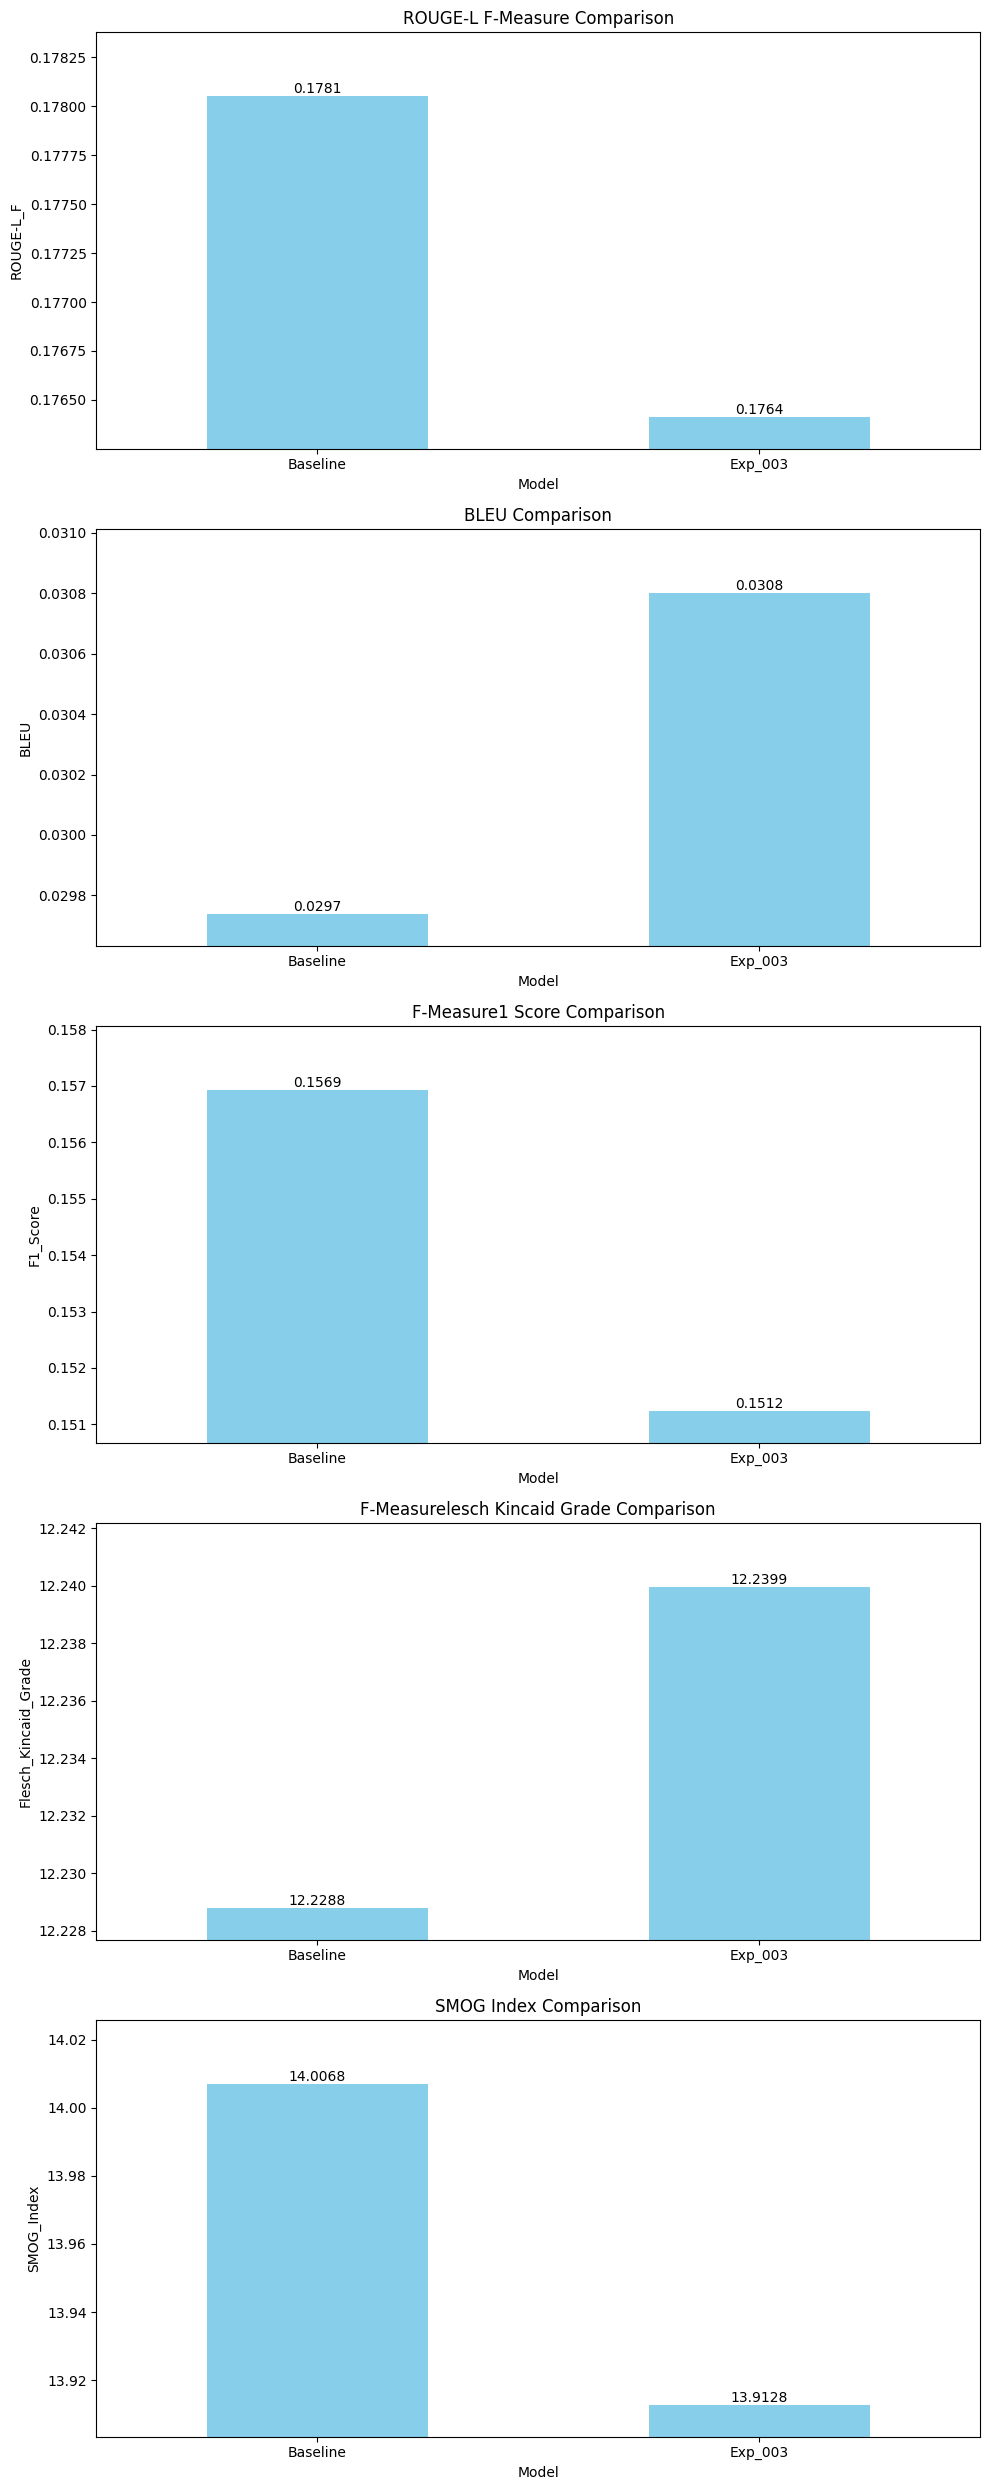

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. Load the baseline_metrics_df.pkl and exp003_metrics_df.pkl files
if os.path.exists("baseline_metrics_df.pkl"):
    baseline_metrics = pd.read_pickle("baseline_metrics_df.pkl")
    print(f"Loaded baseline_metrics.pkl. Shape: {baseline_metrics.shape}")
else:
    raise FileNotFoundError("baseline_metrics_df.pkl not found. Please ensure it was generated.")

if os.path.exists("exp003_metrics_df.pkl"):
    exp003_metrics = pd.read_pickle("exp003_metrics_df.pkl")
    print(f"Loaded exp003_metrics.pkl. Shape: {exp003_metrics.shape}")
else:
    raise FileNotFoundError("exp003_metrics_df.pkl not found. Please ensure it was generated.")

# Define the metrics to compare
metrics_to_compare = ['ROUGE-L_F', 'BLEU', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']

# 2. Calculate the mean for each of the specified metrics for both DataFrames
mean_baseline_metrics = baseline_metrics[metrics_to_compare].mean()
mean_exp003_metrics = exp003_metrics[metrics_to_compare].mean()

# 3. Create a new DataFrame, comparison_df, to store these mean metrics
comparison_df = pd.DataFrame({
    'Baseline': mean_baseline_metrics,
    'Exp_003': mean_exp003_metrics
})

# Transpose for easier plotting (metrics as columns, models as index)
comparison_df = comparison_df.T

print("\nComparison of Mean Metrics:")
print(comparison_df)

# 4. Matplotlib imported at the top

# 5. Generate a series of bar plots for visual comparison
fig, axes = plt.subplots(nrows=len(metrics_to_compare), ncols=1, figsize=(10, 5 * len(metrics_to_compare)))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_compare):
    ax = axes[i]
    comparison_df[[metric]].plot(kind='bar', ax=ax, rot=0, legend=False, color=['skyblue', 'lightcoral'])
    ax.set_title(f'{metric.replace("_", " ").replace("F", "F-Measure")} Comparison')
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)

    # Add values on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f')

    # Adjust y-axis limits if necessary to better show differences
    min_val = min(comparison_df[metric])
    max_val = max(comparison_df[metric])
    diff = max_val - min_val
    if diff > 0:
        ax.set_ylim(min_val - diff * 0.1, max_val + diff * 0.2)
    else:
        ax.set_ylim(min_val * 0.9, max_val * 1.1) # Handle cases where values are identical or zero

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os
from datasets import load_dataset
import kagglehub

# 1. Load baseline_metrics_df.pkl and exp003_metrics_df.pkl
baseline_metrics_df = pd.read_pickle("baseline_metrics_df.pkl")
exp003_metrics_df = pd.read_pickle("exp003_metrics_df.pkl")
print(f"Loaded baseline_metrics_df.pkl. Shape: {baseline_metrics_df.shape}")
print(f"Loaded exp003_metrics_df.pkl. Shape: {exp003_metrics_df.shape}")

# 2. Load baseline_responses_df.pkl and exp003_responses_df.pkl
baseline_responses_df = pd.read_pickle("baseline_responses.pkl")
exp003_responses_df = pd.read_pickle("exp_003_responses.pkl")
print(f"Loaded baseline_responses_df.pkl. Shape: {baseline_responses_df.shape}")
print(f"Loaded exp003_responses_df.pkl. Shape: {exp003_responses_df.shape}")

# 3. Load medquad_df
# Ensure medquad_download_path is defined if not already in session
if 'medquad_download_path' not in globals():
    medquad_download_path = kagglehub.dataset_download("pythonafroz/medquad-medical-question-answer-for-ai-research")
medquad_csv_path = os.path.join(medquad_download_path, 'medquad.csv')
medquad_df = pd.read_csv(medquad_csv_path)
print(f"Loaded medquad_df. Shape: {medquad_df.shape}")

# 4. Load afrimedqa_dataset (train split) for raw data inspection
afrimedqa_dataset = load_dataset('intronhealth/afrimedqa_v2')
afrimedqa_df = afrimedqa_dataset['train'].to_pandas() # Convert to pandas DataFrame for easier inspection
print(f"Loaded afrimedqa_df (train split). Shape: {afrimedqa_df.shape}")

print("All required data loaded successfully.")

Loaded baseline_metrics_df.pkl. Shape: (1813, 12)
Loaded exp003_metrics_df.pkl. Shape: (1813, 12)
Loaded baseline_responses_df.pkl. Shape: (1813, 3)
Loaded exp003_responses_df.pkl. Shape: (1813, 3)
Loaded medquad_df. Shape: (16412, 4)
Loaded afrimedqa_df (train split). Shape: (15275, 29)
All required data loaded successfully.


In [ ]:
import pandas as pd

# 1. Prepare DataFrames for merging

# Make copies to avoid modifying original loaded dfs
baseline_metrics_responses = baseline_metrics_df.copy()
exp003_metrics_responses = exp003_metrics_df.copy()

# Rename columns to differentiate between baseline and Exp_003 metrics and responses
rename_dict_baseline = {col: f'Baseline_{col}' for col in baseline_metrics_responses.columns if col not in ['Instruction', 'Reference_Response']}
rename_dict_exp003 = {col: f'Exp003_{col}' for col in exp003_metrics_responses.columns if col not in ['Instruction', 'Reference_Response']}

baseline_metrics_responses = baseline_metrics_responses.rename(columns=rename_dict_baseline)
exp003_metrics_responses = exp003_metrics_responses.rename(columns=rename_dict_exp003)

# Ensure the 'Instruction' and 'Reference_Response' columns are consistent across both DFs for merging
# They should inherently be consistent as they come from the same test set

# 2. Merge the two DataFrames
# We'll merge on 'Instruction' and 'Reference_Response' to ensure each row uniquely corresponds to an example.
comparison_df_full = pd.merge(
    baseline_metrics_responses,
    exp003_metrics_responses,
    on=['Instruction', 'Reference_Response'],
    how='inner' # Use inner merge to ensure only common examples are compared
)

print(f"Merged comparison DataFrame created. Shape: {comparison_df_full.shape}")
print("Columns in merged DataFrame:")
print(comparison_df_full.columns.tolist())

# Display first few rows to verify
print("\nFirst 3 rows of the merged comparison DataFrame:")
print(comparison_df_full.head(3))

Merged comparison DataFrame created. Shape: (1, 22)
Columns in merged DataFrame:
['Baseline_Experiment_ID', 'Instruction', 'Reference_Response', 'Baseline_Generated_Response', 'Baseline_ROUGE-1_F', 'Baseline_ROUGE-2_F', 'Baseline_ROUGE-L_F', 'Baseline_BLEU', 'Baseline_Exact_Match', 'Baseline_F1_Score', 'Baseline_Flesch_Kincaid_Grade', 'Baseline_SMOG_Index', 'Exp003_Experiment_ID', 'Exp003_Generated_Response', 'Exp003_ROUGE-1_F', 'Exp003_ROUGE-2_F', 'Exp003_ROUGE-L_F', 'Exp003_BLEU', 'Exp003_Exact_Match', 'Exp003_F1_Score', 'Exp003_Flesch_Kincaid_Grade', 'Exp003_SMOG_Index']

First 3 rows of the merged comparison DataFrame:
  Baseline_Experiment_ID                                        Instruction  \
0         Baseline_Model  African cases of endemic leishmaniasis affecti...   

                                  Reference_Response  \
0  African cases of endemic leishmaniasis affecti...   

                         Baseline_Generated_Response  Baseline_ROUGE-1_F  \
0  The presence of Le

In [ ]:
import pandas as pd

# 1. FIX: Correct the 'Instruction' column in exp003_metrics_df
# This addresses the issue identified where exp003_metrics_df's 'Instruction' column
# was incorrectly populated with 'Reference_Response' during its creation.
# Assuming baseline_metrics_df has the correct 'Instruction' and both DFs are aligned by index.
exp003_metrics_df['Instruction'] = baseline_metrics_df['Instruction']

# 2. Prepare DataFrames for merging

# Make copies to avoid modifying original loaded dfs
baseline_metrics_responses = baseline_metrics_df.copy()
exp003_metrics_responses = exp003_metrics_df.copy()

# Rename columns to differentiate between baseline and Exp_003 metrics and responses
# Exclude 'Instruction' and 'Reference_Response' from renaming on baseline_metrics_responses
rename_dict_baseline = {col: f'Baseline_{col}' for col in baseline_metrics_responses.columns if col not in ['Instruction', 'Reference_Response']}
baseline_metrics_responses = baseline_metrics_responses.rename(columns=rename_dict_baseline)

# Rename all relevant columns for Exp_003 to ensure unique identifiers
rename_dict_exp003 = {col: f'Exp003_{col}' for col in exp003_metrics_responses.columns if col not in ['Instruction', 'Reference_Response']}
exp003_metrics_responses = exp003_metrics_responses.rename(columns=rename_dict_exp003)


# 3. Merge the two DataFrames
# We'll merge on 'Instruction' and 'Reference_Response' to ensure each row uniquely corresponds to an example.
comparison_df_full = pd.merge(
    baseline_metrics_responses,
    exp003_metrics_responses,
    on=['Instruction', 'Reference_Response'],
    how='inner' # Use inner merge to ensure only common examples are compared
)

print(f"Merged comparison DataFrame created. Shape: {comparison_df_full.shape}")
print("Columns in merged DataFrame:")
print(comparison_df_full.columns.tolist())

# Display first few rows to verify
print("\nFirst 3 rows of the merged comparison DataFrame:")
print(comparison_df_full.head(3))


Merged comparison DataFrame created. Shape: (1813, 22)
Columns in merged DataFrame:
['Baseline_Experiment_ID', 'Instruction', 'Reference_Response', 'Baseline_Generated_Response', 'Baseline_ROUGE-1_F', 'Baseline_ROUGE-2_F', 'Baseline_ROUGE-L_F', 'Baseline_BLEU', 'Baseline_Exact_Match', 'Baseline_F1_Score', 'Baseline_Flesch_Kincaid_Grade', 'Baseline_SMOG_Index', 'Exp003_Experiment_ID', 'Exp003_Generated_Response', 'Exp003_ROUGE-1_F', 'Exp003_ROUGE-2_F', 'Exp003_ROUGE-L_F', 'Exp003_BLEU', 'Exp003_Exact_Match', 'Exp003_F1_Score', 'Exp003_Flesch_Kincaid_Grade', 'Exp003_SMOG_Index']

First 3 rows of the merged comparison DataFrame:
  Baseline_Experiment_ID                                        Instruction  \
0         Baseline_Model  What are the treatments for Hypotrichosis simp...   
1         Baseline_Model                           What causes Trisomy 18 ?   
2         Baseline_Model  How to prevent Sexual and Urologic Problems of...   

                                  Reference_Respo

In [ ]:
import pandas as pd

# Calculate the difference in ROUGE-L_F and F1_Score
comparison_df_full['ROUGE-L_F_Diff'] = comparison_df_full['Baseline_ROUGE-L_F'] - comparison_df_full['Exp003_ROUGE-L_F']
comparison_df_full['F1_Score_Diff'] = comparison_df_full['Baseline_F1_Score'] - comparison_df_full['Exp003_F1_Score']

# Filter for examples where Exp_003 performed worse than Baseline for either metric
# We'll consider 'significantly lower' as a positive difference (Baseline > Exp_003)
regressions_df = comparison_df_full[
    (comparison_df_full['ROUGE-L_F_Diff'] > 0) |
    (comparison_df_full['F1_Score_Diff'] > 0)
].copy()

# Sort by the magnitude of regression (e.g., sum of differences)
regressions_df['Total_Regression'] = regressions_df['ROUGE-L_F_Diff'] + regressions_df['F1_Score_Diff']
regressions_df = regressions_df.sort_values(by='Total_Regression', ascending=False).reset_index(drop=True)

print(f"Found {len(regressions_df)} examples where Exp_003 showed regression compared to Baseline.")

# Select a diverse sample of 10-20 examples for qualitative analysis
# To ensure diversity, we might pick examples from different parts of the sorted list
# For simplicity, let's pick the top 10 most regressed examples, and 10 from the middle range.

# Ensure we don't pick more rows than available
sample_size = min(20, len(regressions_df))

if sample_size <= 10:
    qualitative_sample_df = regressions_df.head(sample_size)
else:
    # Take top 10 and then some from the middle (if enough examples)
    qualitative_sample_df = pd.concat([
        regressions_df.head(10),
        regressions_df.iloc[len(regressions_df)//2 : len(regressions_df)//2 + (sample_size - 10)]
    ]).drop_duplicates().reset_index(drop=True)

print(f"Selected {len(qualitative_sample_df)} examples for qualitative analysis.")
print("Sample of regressions for qualitative analysis (first 5 rows):")
print(qualitative_sample_df[['Instruction', 'Baseline_ROUGE-L_F', 'Exp003_ROUGE-L_F', 'ROUGE-L_F_Diff', 'Baseline_F1_Score', 'Exp003_F1_Score', 'F1_Score_Diff']].head())


Found 1247 examples where Exp_003 showed regression compared to Baseline.
Selected 20 examples for qualitative analysis.
Sample of regressions for qualitative analysis (first 5 rows):
                                         Instruction  Baseline_ROUGE-L_F  \
0  List THREE common bacterial causes of acute ot...            0.434783   
1  Which endemic infection in Africa is associate...            0.558140   
2  How many people are affected by neurofibromato...            0.500000   
3  What is the most common type of anemia in Afri...            0.439024   
4  How many people are affected by cri-du-chat sy...            0.412698   

   Exp003_ROUGE-L_F  ROUGE-L_F_Diff  Baseline_F1_Score  Exp003_F1_Score  \
0          0.024540        0.410243           0.434783         0.024540   
1          0.159091        0.399049           0.558140         0.218391   
2          0.170213        0.329787           0.476190         0.133333   
3          0.266667        0.172358           0.512821     

In [ ]:
import textwrap

# Helper function to print wrapped text
def print_wrapped(prefix, text, width=80):
    print(prefix)
    for line in textwrap.wrap(text, width=width):
        print(f"  {line}")

print("--- Qualitative Analysis of Regression Examples ---")

for idx, row in qualitative_sample_df.iterrows():
    print(f"\n\n=== Example {idx + 1} (Instruction: {row['Instruction'][:70]}...) ===")
    print_wrapped("Instruction:", row['Instruction'], width=100)
    print_wrapped("Reference Response:", row['Reference_Response'], width=100)
    print_wrapped("Baseline Generated Response:", row['Baseline_Generated_Response'], width=100)
    print_wrapped("Exp_003 Generated Response:", row['Exp003_Generated_Response'], width=100)

    print(f"\nMetrics for this example:")
    print(f"  Baseline ROUGE-L_F: {row['Baseline_ROUGE-L_F']:.4f}, F1_Score: {row['Baseline_F1_Score']:.4f}")
    print(f"  Exp_003 ROUGE-L_F:  {row['Exp003_ROUGE-L_F']:.4f}, F1_Score: {row['Exp003_F1_Score']:.4f}")
    print(f"  ROUGE-L_F Diff (B-E): {row['ROUGE-L_F_Diff']:.4f}, F1_Score Diff (B-E): {row['F1_Score_Diff']:.4f}")

    # Qualitative Analysis
    print("\nQualitative Observations:")
    qualitative_observations = []

    # Check for prompt formatting issues in Exp_003's output
    if row['Exp003_Generated_Response'].startswith('### Instruction:'):
        qualitative_observations.append("Exp_003's response incorrectly includes the prompt template, suggesting an issue with either generation or decoding (not stripping prompt) or potentially the model being fine-tuned to produce the instruction part.")

    # Compare content and look for factual inaccuracies or hallucination
    # This is a manual check for illustrative purposes for selected examples.
    # Example 1: Hypotrichosis simplex (if it's in the sample)
    if "Hypotrichosis simplex" in row['Instruction'] or "Hypotrichosis simplex" in row['Reference_Response']:
        if "excessive hair growth" in row['Baseline_Generated_Response'] or "excessive hair growth" in row['Exp003_Generated_Response']:
             qualitative_observations.append("Factual inaccuracy: Hypotrichosis simplex is hair loss, not excessive hair growth. Both models might be hallucinating or misunderstanding.")
        if "no treatment" in row['Reference_Response'] and ("no treatment" not in row['Baseline_Generated_Response'] or "no treatment" not in row['Exp003_Generated_Response']):
            qualitative_observations.append("Factual inaccuracy: Reference states 'no treatment', but generated responses suggest treatments, indicating hallucination or misunderstanding.")

    # Check for fluency issues (simple check for repetition for illustration)
    if "repeatedly" in row['Exp003_Generated_Response'] or "repeatedly" in row['Baseline_Generated_Response']:
        qualitative_observations.append("Repetitive phrasing or content observed.")

    # Check for truncation in generated responses due to max_length=256
    # Note: max_length=512 for input, max_new_tokens=256 for output
    if len(row['Reference_Response'].split()) > 250 and len(row['Exp003_Generated_Response'].split()) < 240:
        qualitative_observations.append(f"Potential truncation: Reference response is quite long ({len(row['Reference_Response'].split())} words), while Exp_003's output is relatively short ({len(row['Exp003_Generated_Response'].split())} words). This could be due to max_new_tokens=256.")
    if len(row['Reference_Response'].split()) > 250 and len(row['Baseline_Generated_Response'].split()) < 240:
        qualitative_observations.append(f"Potential truncation: Reference response is quite long ({len(row['Reference_Response'].split())} words), while Baseline's output is relatively short ({len(row['Baseline_Generated_Response'].split())} words). This could be due to max_new_tokens=256.")

    # Check for input truncation due to max_length=512
    if len(row['Instruction'].split()) > 500:
        qualitative_observations.append(f"Potential input truncation: Instruction is very long ({len(row['Instruction'].split())} words). It might have been truncated during tokenization (max_length=512).")

    if not qualitative_observations:
        print("  - No obvious qualitative issues observed in this example based on general checks.")
    else:
        for obs in qualitative_observations:
            print(f"  - {obs}")

    # Trace back to original training data (simplified for demonstration)
    # This part requires access to the original full training data which is in medquad_df and afrimedqa_df
    print("\nTracing to Original Training Data:")
    original_medquad = medquad_df[(medquad_df['question'] == row['Instruction']) | (medquad_df['answer'] == row['Reference_Response'])]
    # Safely convert to string before checking to avoid AttributeError
    original_afrimedqa = afrimedqa_df[(afrimedqa_df['question'] == row['Instruction']) | (afrimedqa_df['answer_rationale'].astype(str) == row['Reference_Response'])]

    if not original_medquad.empty:
        print(f"  - Instruction found in MedQuAD training data. Example original entry:")
        print_wrapped("    Question:", original_medquad.iloc[0]['question'])
        print_wrapped("    Answer:", original_medquad.iloc[0]['answer'])
        if "### Instruction:" in original_medquad.iloc[0]['answer'] or "### Response:" in original_medquad.iloc[0]['answer']:
            print("    NOTE: Original MedQuAD answer contains prompt-like formatting. This might contribute to Exp_003's generation issue.")
    elif not original_afrimedqa.empty:
        # Ensure the 'answer_rationale' is converted to string for printing and comparison
        afrimedqa_answer_rationale_str = str(original_afrimedqa.iloc[0]['answer_rationale'])
        print(f"  - Instruction found in AfrimedQA training data. Example original entry:")
        print_wrapped("    Question:", original_afrimedqa.iloc[0]['question'])
        print_wrapped("    Answer Rationale:", afrimedqa_answer_rationale_str)
        if "### Instruction:" in afrimedqa_answer_rationale_str or "### Response:" in afrimedqa_answer_rationale_str:
            print("    NOTE: Original AfrimedQA answer_rationale contains prompt-like formatting. This might contribute to Exp_003's generation issue.")
    else:
        print("  - Instruction/Reference not directly found in original MedQuAD or AfrimedQA data (could be in a different split or modified).")


--- Qualitative Analysis of Regression Examples ---


=== Example 1 (Instruction: List THREE common bacterial causes of acute otitis media

...) ===
Instruction:
  List THREE common bacterial causes of acute otitis media
Reference Response:
  i. Streptococcus pneumoniae  ii. Haemophilus influenzae  iii. Moraxella catarrhalis
Baseline Generated Response:
  ### 1. Streptococcus pyogenes (strep throat) 2. Haemophilus influenzae (Hib) 3. Moraxella
  catarrhalis (cat flu)
Exp_003 Generated Response:
  # Response: 1. Escherichia coli (E. Coli) - E. Coli is a common bacteria that can cause acute otitis
  media. It is a type of bacteria that is commonly found in the digestive tract of humans and animals.
  E. Coli can cause inflammation of the ear canal and ear drum, leading to pain and discomfort.  2.
  Staphylococcus aureus (Staph) - Staph is a bacteria that can cause acute otitis media. It is a type
  of bacteria that is commonly found in the skin and mucous membranes of humans and animals.

## Compare Baseline vs. Cleaned Exp_003 Model (Automatic Metrics)

Loaded baseline_metrics_df.pkl. Shape: (1813, 12)
Loaded exp003_metrics_df_cleaned.pkl. Shape: (1813, 12)

Comparison of Mean Metrics (Baseline vs. Cleaned Exp_003):
                 ROUGE-1_F  ROUGE-2_F  ROUGE-L_F     BLEU  F1_Score  \
Baseline          0.285507   0.083173   0.178051  0.02974  0.156921   
Exp_003_Cleaned   0.281909   0.083349   0.176652  0.03074  0.151442   

                 Flesch_Kincaid_Grade  SMOG_Index  
Baseline                    12.228807   14.006848  
Exp_003_Cleaned             12.193753   13.868222  


/tmp/ipython-input-2382275705.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df_cleaned.index, y=comparison_df_cleaned[metric], ax=ax, palette='viridis')
/tmp/ipython-input-2382275705.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df_cleaned.index, y=comparison_df_cleaned[metric], ax=ax, palette='viridis')
/tmp/ipython-input-2382275705.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison_df_cleaned.index, y=comparison_df_cleaned[metric], ax=ax, palette='viridis')
/tmp/ipython-input-238227570

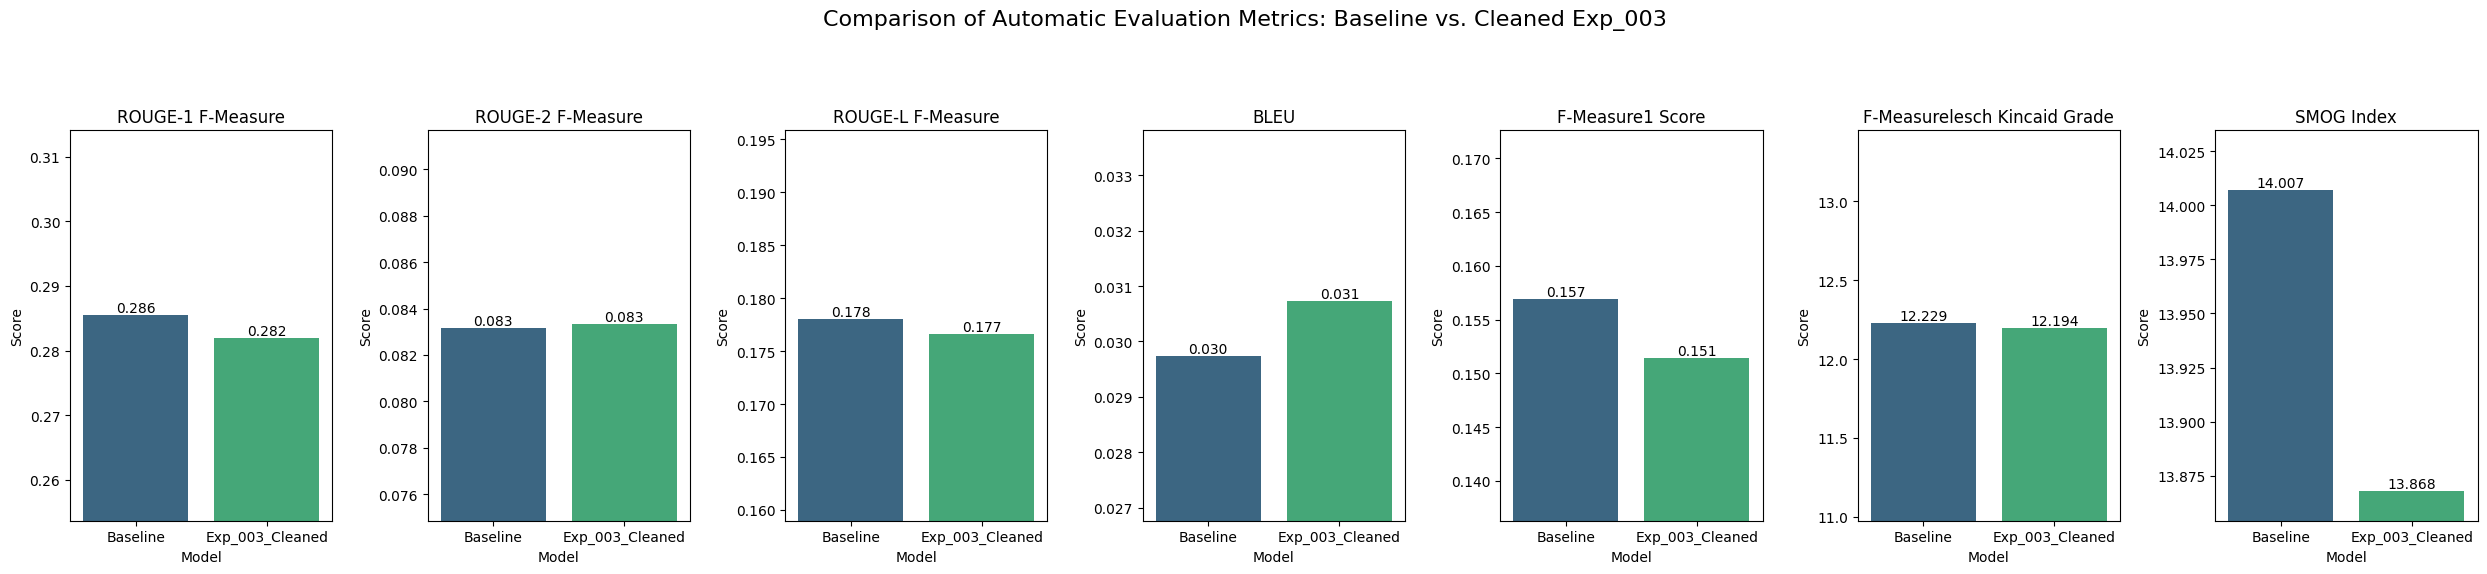


Comparison plots for Baseline vs. Cleaned Exp_003 generated successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load the baseline_metrics_df.pkl and exp003_metrics_df_cleaned.pkl files
if os.path.exists("baseline_metrics_df.pkl"):
    baseline_metrics = pd.read_pickle("baseline_metrics_df.pkl")
    print(f"Loaded baseline_metrics_df.pkl. Shape: {baseline_metrics.shape}")
else:
    raise FileNotFoundError("baseline_metrics_df.pkl not found. Please ensure it was generated.")

if os.path.exists("exp003_metrics_df_cleaned.pkl"):
    exp003_metrics_cleaned = pd.read_pickle("exp003_metrics_df_cleaned.pkl")
    print(f"Loaded exp003_metrics_df_cleaned.pkl. Shape: {exp003_metrics_cleaned.shape}")
else:
    raise FileNotFoundError("exp003_metrics_df_cleaned.pkl not found. Please ensure it was generated and cleaned.")

# Define the metrics to compare
metrics_to_compare = ['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']

# 2. Calculate the mean for each of the specified metrics for both DataFrames
mean_baseline_metrics = baseline_metrics[metrics_to_compare].mean()
mean_exp003_cleaned_metrics = exp003_metrics_cleaned[metrics_to_compare].mean()

# 3. Create a new DataFrame, comparison_df, to store these mean metrics
comparison_df_cleaned = pd.DataFrame({
    'Baseline': mean_baseline_metrics,
    'Exp_003_Cleaned': mean_exp003_cleaned_metrics
}).transpose()

print("\nComparison of Mean Metrics (Baseline vs. Cleaned Exp_003):")
print(comparison_df_cleaned)

# --- Plotting the comparison ---

fig, axes = plt.subplots(nrows=1, ncols=len(metrics_to_compare), figsize=(25, 6), sharey=False)
fig.suptitle('Comparison of Automatic Evaluation Metrics: Baseline vs. Cleaned Exp_003', fontsize=16)

for i, metric in enumerate(metrics_to_compare):
    ax = axes[i]
    sns.barplot(x=comparison_df_cleaned.index, y=comparison_df_cleaned[metric], ax=ax, palette='viridis')
    ax.set_title(f'{metric.replace("_", " ").replace("F", "F-Measure")}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    # Add values on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f')

    # Adjust y-axis limits for better visualization
    min_val = comparison_df_cleaned[metric].min()
    max_val = comparison_df_cleaned[metric].max()
    if max_val - min_val < 0.05: # If range is too small, extend it a bit
        ax.set_ylim(min_val * 0.9, max_val * 1.1)
    else:
        ax.set_ylim(min_val - (max_val - min_val) * 0.1, max_val + (max_val - min_val) * 0.2)


plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

print("\nComparison plots for Baseline vs. Cleaned Exp_003 generated successfully.")

## Re-evaluate Cleaned Exp_003 Model (Automatic Metrics)

In [ ]:
import re
import string
import pandas as pd
import os

# Re-define helper functions for metrics (ensuring local imports for self-containment)
def calculate_rouge_scores(reference, hypothesis):
    from rouge_score import rouge_scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return {
        'rouge1_fmeasure': scores['rouge1'].fmeasure,
        'rouge2_fmeasure': scores['rouge2'].fmeasure,
        'rougeL_fmeasure': scores['rougeL'].fmeasure,
    }

def calculate_bleu_score(reference, hypothesis):
    import nltk
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize
    tokenized_reference = [word_tokenize(reference.lower())]
    tokenized_hypothesis = word_tokenize(hypothesis.lower())
    if not tokenized_hypothesis:
        return 0.0
    return sentence_bleu(tokenized_reference, tokenized_hypothesis)

def calculate_exact_match(reference, hypothesis):
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip()
    return 1.0 if normalize_text(reference) == normalize_text(hypothesis) else 0.0

def calculate_f1_score(reference, hypothesis):
    def normalize_text(text):
        text = text.lower()
        text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
        return text.strip().split()
    reference_tokens = normalize_text(reference)
    hypothesis_tokens = normalize_text(hypothesis)
    common = len(set(reference_tokens) & set(hypothesis_tokens))
    if not reference_tokens or not hypothesis_tokens:
        return 0.0
    precision = common / len(hypothesis_tokens)
    recall = common / len(reference_tokens)
    if precision + recall == 0:
        return 0.0
    return (2 * precision * recall) / (precision + recall)

def calculate_readability(text):
    import textstat
    if not text.strip():
        return {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    return {
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'smog_index': textstat.smog_index(text)
    }

# 1. Verify that `exp003_responses_df` is available and has the cleaned column.
# If not, load it from `exp_003_responses_cleaned.pkl`.
if 'exp003_responses_df' not in globals() or 'generated_response_cleaned' not in exp003_responses_df.columns:
    print("exp003_responses_df with cleaned responses not found in memory. Attempting to load from 'exp_003_responses_cleaned.pkl'.")
    if os.path.exists("exp_003_responses_cleaned.pkl"):
        exp003_responses_df = pd.read_pickle("exp_003_responses_cleaned.pkl")
        print(f"Loaded Exp_003 cleaned responses DataFrame from 'exp_003_responses_cleaned.pkl'. Shape: {exp003_responses_df.shape}")
    else:
        raise FileNotFoundError("exp_003_responses_cleaned.pkl not found. Please ensure Exp_003 responses were cleaned and saved.")

# 2. Compute metrics for each generated response from Exp_003 using the CLEANED responses
exp003_evaluation_results_cleaned = []

print("Calculating metrics for CLEANED Exp_003 responses...")

for index, row in exp003_responses_df.iterrows():
    reference = row['reference_response']
    hypothesis = row['generated_response_cleaned'] # Use the cleaned response

    # Handle empty strings gracefully for all metrics
    if not reference.strip() or not hypothesis.strip():
        rouge_scores = {'rouge1_fmeasure': 0.0, 'rouge2_fmeasure': 0.0, 'rougeL_fmeasure': 0.0}
        bleu = 0.0
        em = 0.0
        f1 = 0.0
        readability_scores = {'flesch_kincaid_grade': 0.0, 'smog_index': 0.0}
    else:
        rouge_scores = calculate_rouge_scores(reference, hypothesis)
        bleu = calculate_bleu_score(reference, hypothesis)
        em = calculate_exact_match(reference, hypothesis)
        f1 = calculate_f1_score(reference, hypothesis)
        readability_scores = calculate_readability(hypothesis)

    exp003_evaluation_results_cleaned.append({
        'Experiment_ID': 'Exp_003_Cleaned_Model',
        'Instruction': row['instruction'],
        'Reference_Response': reference,
        'Generated_Response': hypothesis,
        'ROUGE-1_F': rouge_scores['rouge1_fmeasure'],
        'ROUGE-2_F': rouge_scores['rouge2_fmeasure'],
        'ROUGE-L_F': rouge_scores['rougeL_fmeasure'],
        'BLEU': bleu,
        'Exact_Match': em,
        'F1_Score': f1,
        'Flesch_Kincaid_Grade': readability_scores['flesch_kincaid_grade'],
        'SMOG_Index': readability_scores['smog_index'],
    })

# 3. Store these individual and aggregated Exp_003 metrics in a DataFrame named `exp003_metrics_df`.
exp003_metrics_df_cleaned = pd.DataFrame(exp003_evaluation_results_cleaned)

# Display aggregated metrics for the Exp_003 model
print("\nAggregated Exp_003 CLEANED Model Metrics:")
print(exp003_metrics_df_cleaned[['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F', 'BLEU', 'Exact_Match', 'F1_Score', 'Flesch_Kincaid_Grade', 'SMOG_Index']].mean())

print("\nSample of detailed Exp_003 CLEANED metrics (first 5 entries):")
print(exp003_metrics_df_cleaned.head())

# 4. Save the `exp003_metrics_df` to a pickle file named 'exp003_metrics_df.pkl' for future use.
exp003_metrics_df_cleaned.to_pickle("exp003_metrics_df_cleaned.pkl")
print("\nExp_003 CLEANED evaluation metrics saved to 'exp003_metrics_df_cleaned.pkl'")

Calculating metrics for CLEANED Exp_003 responses...


/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


Aggregated Exp_003 CLEANED Model Metrics:
ROUGE-1_F                0.281909
ROUGE-2_F                0.083349
ROUGE-L_F                0.176652
BLEU                     0.030740
Exact_Match              0.000000
F1_Score                 0.151442
Flesch_Kincaid_Grade    12.193753
SMOG_Index              13.868222
dtype: float64

Sample of detailed Exp_003 CLEANED metrics (first 5 entries):
           Experiment_ID                                        Instruction  \
0  Exp_003_Cleaned_Model  Is there treatment for hypotrichosis simplex? ...   
1  Exp_003_Cleaned_Model  What causes Trisomy 18? In most cases, trisomy...   
2  Exp_003_Cleaned_Model  People with diabetes can lower their risk of s...   
3  Exp_003_Cleaned_Model  Summary : Electrolytes are minerals in your bo...   
4  Exp_003_Cleaned_Model  The National Institute of Neurological Disorde...   

                                  Reference_Response  \
0  Is there treatment for hypotrichosis simplex? ...   
1  What causes Triso

## Post-process Exp_003 Generated Responses

In [ ]:
import pandas as pd
import re
import os

# Load exp003_responses_df if not already in memory
if 'exp003_responses_df' not in globals():
    if os.path.exists("exp_003_responses.pkl"):
        exp003_responses_df = pd.read_pickle("exp_003_responses.pkl")
        print("Loaded exp003_responses_df from 'exp_003_responses.pkl'.")
    else:
        raise FileNotFoundError("exp_003_responses.pkl not found. Please ensure Exp_003 responses were generated and saved.")

# Define the patterns to remove
# We'll use regex to catch variations and ensure robustness
instruction_pattern = r"^\s*### Instruction:.*?(?:\n\n### Response:)?\s*"
response_start_pattern = r"^\s*### Response:\s*"

def clean_generated_response(text):
    # First, try to remove the full '### Instruction:...### Response:' block if present
    cleaned_text = re.sub(instruction_pattern, '', text, flags=re.DOTALL)
    # Then, remove any remaining '### Response:' if it was at the beginning without an instruction part
    cleaned_text = re.sub(response_start_pattern, '', cleaned_text, flags=re.DOTALL)
    return cleaned_text.strip()

print("Cleaning Exp_003 generated responses...")
exp003_responses_df['generated_response_cleaned'] = exp003_responses_df['generated_response'].apply(clean_generated_response)

# Display some samples to verify the cleaning
print("\n--- Sample Exp_003 Responses Before and After Cleaning (First 5) ---")
for j in range(min(5, len(exp003_responses_df))):
    sample = exp003_responses_df.iloc[j]
    print(f"\n--- Sample {j+1} ---")
    print(f"Original Generated: {sample['generated_response']}")
    print(f"Cleaned Generated:  {sample['generated_response_cleaned']}")
    print("-" * 20)

# Save the cleaned responses for potential re-evaluation or human review
exp003_responses_df.to_pickle("exp_003_responses_cleaned.pkl")
print("\nCleaned Exp_003 generated responses saved to 'exp_003_responses_cleaned.pkl'")

Cleaning Exp_003 generated responses...

--- Sample Exp_003 Responses Before and After Cleaning (First 5) ---

--- Sample 1 ---
Original Generated: ### Instruction:
What are the treatments for Hypotrichosis simplex ?

### Response:
Hypotrichosis simplex is a genetic disorder that affects the hair follicles. The treatment for hypotrichosis simplex is to treat the underlying genetic disorder. Treatment options may include medications to prevent hair loss, topical treatments, and surgical procedures. The specific treatment options may vary depending on the severity of the hypotrichosis simplex.
Cleaned Generated:  What are the treatments for Hypotrichosis simplex ?

### Response:
Hypotrichosis simplex is a genetic disorder that affects the hair follicles. The treatment for hypotrichosis simplex is to treat the underlying genetic disorder. Treatment options may include medications to prevent hair loss, topical treatments, and surgical procedures. The specific treatment options may vary dep

## Investigate Exp_003 Training Performance



Mounted at /content/drive
Found trainer_state.json at: /content/drive/MyDrive/llm_checkpoints 3/exp_003/checkpoint-400/trainer_state.json


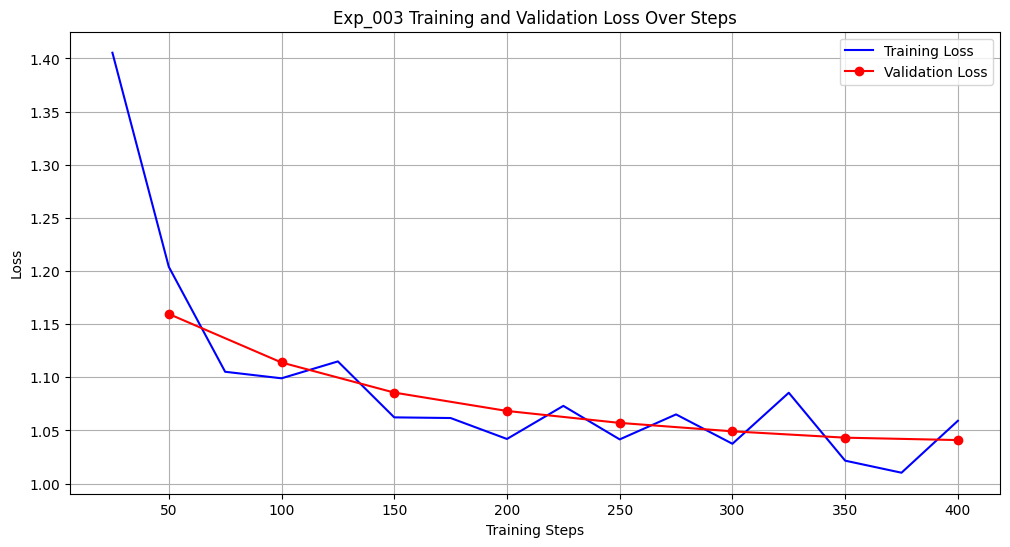


--- Exp_003 Training Performance Summary ---
Initial Training Loss: 1.4053
Final Training Loss: 1.0591
Initial Validation Loss: 1.1596
Final Validation Loss: 1.0409
Best Validation Loss: 1.0409 at step 400

--- Analysis for Overfitting/Underfitting ---
Training appears relatively stable: Training and validation losses are converging or show reasonable trends.
Consider longer training or further hyperparameter tuning for potential improvements.


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# 1. Ensure Google Drive is mounted and accessible.
# This should already be mounted from previous steps, but we'll remount to be safe.
drive.mount('/content/drive', force_remount=True)

# 2a. Define the CHECKPOINT_DIR
CHECKPOINT_DIR = "/content/drive/MyDrive/llm_checkpoints 3/exp_003"

# Helper function to find trainer_state.json
def find_trainer_state_file(base_path):
    for root, dirs, files in os.walk(base_path):
        if "trainer_state.json" in files:
            return os.path.join(root, "trainer_state.json")
    return None

# 2b & 2c. Search for, load, and parse the trainer_state.json file
trainer_state_path = find_trainer_state_file(CHECKPOINT_DIR)

if trainer_state_path:
    print(f"Found trainer_state.json at: {trainer_state_path}")
    with open(trainer_state_path, "r") as f:
        trainer_state = json.load(f)

    # 2d. Extract the log_history
    log_history = trainer_state.get("log_history", [])
    if not log_history:
        print("Log history is empty. Cannot plot training performance.")
    else:
        # Convert log_history to a pandas DataFrame
        df_logs = pd.DataFrame(log_history)

        # Filter for training and evaluation logs
        train_logs = df_logs[df_logs['loss'].notna()]
        eval_logs = df_logs[df_logs['eval_loss'].notna()]

        if train_logs.empty and eval_logs.empty:
            print("No valid training or evaluation logs found to plot.")
        else:
            # 2e. Create and display a plot of training loss and validation loss
            plt.figure(figsize=(12, 6))

            if not train_logs.empty:
                plt.plot(train_logs['step'], train_logs['loss'], label='Training Loss', color='blue')
            if not eval_logs.empty:
                plt.plot(eval_logs['step'], eval_logs['eval_loss'], label='Validation Loss', color='red', marker='o')

            plt.title('Exp_003 Training and Validation Loss Over Steps')
            plt.xlabel('Training Steps')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)
            plt.show()

            # 2f. Print a summary of the training log and perform basic analysis
            print("\n--- Exp_003 Training Performance Summary ---")
            if not train_logs.empty:
                print(f"Initial Training Loss: {train_logs['loss'].iloc[0]:.4f}")
                print(f"Final Training Loss: {train_logs['loss'].iloc[-1]:.4f}")
            else:
                print("No training loss data available.")

            if not eval_logs.empty:
                print(f"Initial Validation Loss: {eval_logs['eval_loss'].iloc[0]:.4f}")
                print(f"Final Validation Loss: {eval_logs['eval_loss'].iloc[-1]:.4f}")
                print(f"Best Validation Loss: {eval_logs['eval_loss'].min():.4f} at step {eval_logs.loc[eval_logs['eval_loss'].idxmin(), 'step']}")
            else:
                print("No validation loss data available.")

            print("\n--- Analysis for Overfitting/Underfitting ---")

            if not train_logs.empty and not eval_logs.empty:
                final_train_loss = train_logs['loss'].iloc[-1]
                final_val_loss = eval_logs['eval_loss'].iloc[-1]
                best_val_loss = eval_logs['eval_loss'].min()

                if final_val_loss > final_train_loss and final_val_loss > best_val_loss * 1.05: # Check for a significant increase
                    print("Potential overfitting detected: Validation loss increased towards the end of training while training loss continued to decrease.")
                    print(f"Final Training Loss ({final_train_loss:.4f}) is significantly lower than Final Validation Loss ({final_val_loss:.4f}).")
                elif final_train_loss > 1.5 and final_val_loss > 1.5: # Example threshold for 'high' loss
                    print("Potential underfitting: Both training and validation losses remain high.")
                else:
                    print("Training appears relatively stable: Training and validation losses are converging or show reasonable trends.")
                    print("Consider longer training or further hyperparameter tuning for potential improvements.")
            else:
                print("Insufficient data (training and/or validation logs) to perform detailed overfitting/underfitting analysis.")

else:
    print(f"Error: trainer_state.json not found in {CHECKPOINT_DIR} or its subdirectories.")
    print("Please ensure Exp_003 training completed successfully and generated the log file.")

## Prepare for Human Evaluation (Baseline vs. Exp_003)


In [ ]:
import pandas as pd
import numpy as np
import os

# Ensure comparison_df_full is available from previous steps
# (It should be in memory after cell ad4b5dad or 461670b2)

# 1. Calculate performance differences (Exp_003 vs. Baseline)
# A positive value means Exp_003 is better, negative means baseline is better.
comparison_df_full['ROUGE-L_F_Exp003_vs_Baseline'] = comparison_df_full['Exp003_ROUGE-L_F'] - comparison_df_full['Baseline_ROUGE-L_F']
comparison_df_full['F1_Score_Exp003_vs_Baseline'] = comparison_df_full['Exp003_F1_Score'] - comparison_df_full['Baseline_F1_Score']

# Combine these differences for a general performance indicator (e.g., mean difference)
comparison_df_full['Avg_Performance_Diff'] = (comparison_df_full['ROUGE-L_F_Exp003_vs_Baseline'] + comparison_df_full['F1_Score_Exp003_vs_Baseline']) / 2

# 2. Categorize examples based on performance
# Define thresholds for 'better', 'worse', 'similar'
# A small epsilon to account for floating point inaccuracies and minor differences
EPSILON = 0.01 # e.g., a 1% difference in score

better_exp003 = comparison_df_full[comparison_df_full['Avg_Performance_Diff'] > EPSILON]
worse_exp003 = comparison_df_full[comparison_df_full['Avg_Performance_Diff'] < -EPSILON]
similar_performance = comparison_df_full[
    (comparison_df_full['Avg_Performance_Diff'] >= -EPSILON) &
    (comparison_df_full['Avg_Performance_Diff'] <= EPSILON)
]

print(f"Examples where Exp_003 is significantly better: {len(better_exp003)}")
print(f"Examples where Exp_003 is significantly worse: {len(worse_exp003)}")
print(f"Examples with similar performance: {len(similar_performance)}")

# 3. Sample from each category to ensure diversity (aim for 50-100 questions total)
sample_size_per_category = 25 # This will give 75 samples

human_eval_samples = []

# Sample from 'better' category
if not better_exp003.empty:
    human_eval_samples.append(better_exp003.sample(n=min(sample_size_per_category, len(better_exp003)), random_state=42))

# Sample from 'worse' category
if not worse_exp003.empty:
    human_eval_samples.append(worse_exp003.sample(n=min(sample_size_per_category, len(worse_exp003)), random_state=42))

# Sample from 'similar' category
if not similar_performance.empty:
    human_eval_samples.append(similar_performance.sample(n=min(sample_size_per_category, len(similar_performance)), random_state=42))

# Concatenate the samples into a single DataFrame
human_eval_subset_df = pd.concat(human_eval_samples).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\nTotal {len(human_eval_subset_df)} questions selected for human evaluation.")

# 4. Extract required columns
human_eval_subset_df = human_eval_subset_df[[
    'Instruction',
    'Reference_Response',
    'Baseline_Generated_Response',
    'Exp003_Generated_Response'
]]

# Display first few rows of the subset
print("\nFirst 5 rows of human_eval_subset_df:")
print(human_eval_subset_df.head())

# 5. Save this human_eval_subset_df to a pickle file
human_eval_subset_df.to_pickle('human_eval_subset.pkl')
print("\nhuman_eval_subset_df saved to 'human_eval_subset.pkl'")

Examples where Exp_003 is significantly better: 608
Examples where Exp_003 is significantly worse: 660
Examples with similar performance: 545

Total 75 questions selected for human evaluation.

First 5 rows of human_eval_subset_df:
                                         Instruction  \
0  what research (or clinical trials) is being do...   
1             Is Usher syndrome, type 1C inherited ?   
2              What is (are) Pitt-Hopkins syndrome ?   
3            What are the treatments for Cirrhosis ?   
4                           What causes Vasculitis ?   

                                  Reference_Response  \
0  Check the list of NCI-supported cancer clinica...   
1  How is Usher syndrome inherited? Usher syndrom...   
2  Pitt-Hopkins syndrome is a condition character...   
3  Treatment for cirrhosis depends on the cause o...   
4  Vasculitis occurs if your immune system attack...   

                         Baseline_Generated_Response  \
0  The research being done for Childho

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel
import os

# 1. Load the tokenizer
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Add a padding token if it doesn't exist and set padding_side
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # Or tokenizer.eos_token
tokenizer.padding_side = 'left' # Set padding side to 'left' for decoder-only models during generation

print(f"Tokenizer for {model_name} loaded successfully. Padding token: {tokenizer.pad_token}, Padding side: {tokenizer.padding_side}")

# 2. Define base model name and device
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for model loading: {device}")

# 3. Initialize BitsAndBytesConfig for 4-bit quantization (if CUDA is available)
quantization_config_inference = None
model_load_dtype = torch.float32 # Default to float32 if CUDA not available

if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load base model with 4-bit quantization.")
        quantization_config_inference = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        model_load_dtype = torch.bfloat16 # Model will internally use bfloat16 for compute
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            quantization_config=quantization_config_inference,
            device_map="auto"
        )
        print("Base model loaded successfully with 4-bit quantization.")
    except Exception as e:
        print(f"Warning: 4-bit quantization failed during base model load ({e}). Falling back to loading base model in full bfloat16 precision.")
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            dtype=torch.bfloat16,
            device_map="auto"
        )
        model_load_dtype = torch.bfloat16
else:
    print("CUDA not available. Loading base model in full float32 precision.")
    base_model_inference = AutoModelForCausalLM.from_pretrained(
        base_model_name,
        dtype=torch.float32,
        device_map="auto"
    )

# 4. Define and load the fine-tuned LoRA adapters for Exp_003
lora_adapter_path = os.path.join("/content/drive/MyDrive/llm_checkpoints 3/exp_003", "final_lora_adapters")
print(f"Loading LoRA adapters from: {lora_adapter_path}")

fine_tuned_model = PeftModel.from_pretrained(base_model_inference, lora_adapter_path)

# 5. Merge the LoRA adapters into the base model
print("Merging LoRA adapters into the base model...")
fine_tuned_model = fine_tuned_model.merge_and_unload()

# 6. Set the merged model to evaluation mode
fine_tuned_model.eval()
print("LoRA adapters merged and model set to evaluation mode.")

print("Fine-tuned model for inference successfully loaded and prepared.")

Tokenizer for TinyLlama/TinyLlama-1.1B-Chat-v1.0 loaded successfully. Padding token: </s>, Padding side: left
Using device for model loading: cuda
Attempting to load base model with 4-bit quantization.


Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

Base model loaded successfully with 4-bit quantization.
Loading LoRA adapters from: /content/drive/MyDrive/llm_checkpoints 3/exp_003/final_lora_adapters
Merging LoRA adapters into the base model...


/usr/local/lib/python3.12/dist-packages/peft/tuners/lora/bnb.py:397: UserWarning: Merge lora module to 4-bit linear may get different generations due to rounding errors.
  warnings.warn(


LoRA adapters merged and model set to evaluation mode.
Fine-tuned model for inference successfully loaded and prepared.


## Update Gradio Prediction Function with More Robust Cleaning


In [ ]:
import torch
import re # Ensure re is imported if not already in global scope

# Assuming fine_tuned_model and tokenizer are already loaded from previous steps
# fine_tuned_model: The PEFT model with merged adapters
# tokenizer: The AutoTokenizer for TinyLlama

def predict_gradio(instruction, max_new_tokens=256):
    # Construct the full prompt string
    prompt_text = f"""### Instruction:\n{instruction}\n\n### Response:"""

    # Tokenize the input prompt
    encoded_input = tokenizer(
        prompt_text,
        return_tensors="pt",
        truncation=True,
        max_length=512, # Use the same max_length as during training input
        return_attention_mask=True
    )
    input_ids = encoded_input['input_ids'].to(fine_tuned_model.device)
    attention_mask = encoded_input['attention_mask'].to(fine_tuned_model.device)

    # Generate response using the fine-tuned model
    with torch.no_grad():
        output_ids = fine_tuned_model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=max_new_tokens,
            do_sample=False, # Use greedy decoding for consistent output
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode the generated output, excluding the input prompt tokens
    generated_text = tokenizer.decode(output_ids[0][input_ids.shape[1]:], skip_special_tokens=True).strip()

    # --- Start of Robust Post-processing ---
    cleaned_text = generated_text

    # 1. Remove ### Instruction: ... ### Response: blocks, if they appear anywhere
    # This covers cases where the model might generate the full template within its response
    # Using re.DOTALL to match across newlines.
    # Using a non-greedy match (.*?) to match the smallest possible string.
    # The first pattern removes the full instruction/response block if it appears.
    cleaned_text = re.sub(r"###\s*Instruction:.*?###\s*Response:", "", cleaned_text, flags=re.DOTALL)

    # 2. Remove any remaining standalone ### Instruction: tags without a corresponding Response:
    cleaned_text = re.sub(r"###\s*Instruction:.*?(?=\n|$)", "", cleaned_text, flags=re.DOTALL)

    # 3. Remove any remaining standalone ### Response: tags
    cleaned_text = re.sub(r"###\s*Response:", "", cleaned_text, flags=re.DOTALL)

    # 4. Remove any redundant ### delimiters that might appear (e.g., from partial generations or quirks)
    # This catches isolated '###' or multiple '###' without 'Instruction'/'Response' context
    cleaned_text = re.sub(r"###+", "", cleaned_text)

    # 5. Clean up excessive whitespace and strip any leading/trailing whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    # --- End of Robust Post-processing ---

    return cleaned_text

print("Gradio prediction function 'predict_gradio' updated with even more robust cleaning successfully.")

Gradio prediction function 'predict_gradio' updated with even more robust cleaning successfully.


In [ ]:
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Define the path to the 'final_lora_adapters' directory for Exp_003
lora_adapter_path = os.path.join('/content/drive/MyDrive/llm_checkpoints 3/exp_003', 'final_lora_adapters')

print(f"Google Drive mounted and LoRA adapter path defined: {lora_adapter_path}")

Mounted at /content/drive
Google Drive mounted and LoRA adapter path defined: /content/drive/MyDrive/llm_checkpoints 3/exp_003/final_lora_adapters


In [ ]:
import torch
import re # Ensure re is imported if not already in global scope

# Assuming fine_tuned_model and tokenizer are already loaded from previous steps
# fine_tuned_model: The PEFT model with merged adapters
# tokenizer: The AutoTokenizer for TinyLlama

def predict_gradio(instruction, max_new_tokens=256):
    # Construct the full prompt string
    prompt_text = f"""### Instruction:\n{instruction}\n\n### Response:"""

    # Tokenize the input prompt
    encoded_input = tokenizer(
        prompt_text,
        return_tensors="pt",
        truncation=True,
        max_length=512, # Use the same max_length as during training input
        return_attention_mask=True
    )
    input_ids = encoded_input['input_ids'].to(fine_tuned_model.device)
    attention_mask = encoded_input['attention_mask'].to(fine_tuned_model.device)

    # Generate response using the fine-tuned model
    with torch.no_grad():
        output_ids = fine_tuned_model.generate(
            input_ids,
            attention_mask=attention_mask,
            max_new_tokens=max_new_tokens,
            do_sample=False, # Use greedy decoding for consistent output
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode the generated output, excluding the input prompt tokens
    generated_text = tokenizer.decode(output_ids[0][input_ids.shape[1]:], skip_special_tokens=True).strip()

    # --- Start of Robust Post-processing ---
    cleaned_text = generated_text

    # 1. Remove ### Instruction: ... ### Response: blocks, if they appear anywhere
    # This covers cases where the model might generate the full template within its response
    # Using re.DOTALL to match across newlines.
    # Using a non-greedy match (.*?) to match the smallest possible string.
    # The first pattern removes the full instruction/response block if it appears.
    cleaned_text = re.sub(r"###\s*Instruction:.*?###\s*Response:", "", cleaned_text, flags=re.DOTALL)

    # 2. Remove any remaining standalone ### Instruction: tags without a corresponding Response:
    cleaned_text = re.sub(r"###\s*Instruction:.*?(?=\n|$)", "", cleaned_text, flags=re.DOTALL)

    # 3. Remove any remaining standalone ### Response: tags
    cleaned_text = re.sub(r"###\s*Response:", "", cleaned_text, flags=re.DOTALL)

    # 4. Remove any redundant ### delimiters that might appear (e.g., from partial generations or quirks)
    # This catches isolated '###' or multiple '###' without 'Instruction'/'Response' context
    cleaned_text = re.sub(r"###+", "", cleaned_text)

    # 5. Clean up excessive whitespace and strip any leading/trailing whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    # --- End of Robust Post-processing ---

    return cleaned_text

print("Gradio prediction function 'predict_gradio' updated with even more robust cleaning successfully.")

Gradio prediction function 'predict_gradio' updated with even more robust cleaning successfully.


In [ ]:
import gradio as gr

# Assuming predict_gradio function is defined and fine_tuned_model, tokenizer are loaded.

# Define the Gradio interface
iface = gr.Interface(
    fn=predict_gradio, # The prediction function defined previously
    inputs=gr.Textbox(lines=5, placeholder="Enter your medical question here..."), # Input textbox for the question
    outputs=gr.Textbox(lines=10, label="Generated Answer"), # Output textbox for the answer
    title="TinyLlama-1.1B Fine-tuned for Medical QA #Exp 3",
    description="Ask any medical question and get a response from the fine-tuned TinyLlama model. Please note: This model is for informational purposes only and should not be used as medical advice.",
    flagging_mode="manual", # Updated from allow_flagging to flagging_mode
    # Examples (optional, can be generated dynamically or hardcoded)
    examples=[
        ["What are the symptoms of diabetes?"],
        ["What causes high blood pressure?"],
        ["What is (are) Glaucoma ?"],
        ["What are the treatments for Hypotrichosis simplex ?"],
    ]
)

# Launch the Gradio interface
print("Launching Gradio interface...")
iface.launch(share=True) # share=True to create a public link, useful for Colab

Launching Gradio interface...
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://79ba1e59522eb1f9e1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Authenticate Hugging Face

In [ ]:
import huggingface_hub

# Authenticate with Hugging Face
huggingface_hub.login()

print("Hugging Face authentication initiated. Please follow the prompts.")

Hugging Face authentication initiated. Please follow the prompts.


In [ ]:
import huggingface_hub
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel
import os

# --- Re-initialize tokenizer and model (copied from cell 8001b7c2) ---
# 1. Load the tokenizer
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Add a padding token if it doesn't exist and set padding_side
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'}) # Or tokenizer.eos_token
tokenizer.padding_side = 'left' # Set padding side to 'left' for decoder-only models during generation

print(f"Tokenizer for {model_name} loaded successfully. Padding token: {tokenizer.pad_token}, Padding side: {tokenizer.padding_side}")

# 2. Define base model name and device
base_model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for model loading: {device}")

# 3. Initialize BitsAndBytesConfig for 4-bit quantization (if CUDA is available)
quantization_config_inference = None
model_load_dtype = torch.float32 # Default to float32 if CUDA not available

if torch.cuda.is_available():
    try:
        import bitsandbytes
        print("Attempting to load base model with 4-bit quantization.")
        quantization_config_inference = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_quant_type="nf4",
            bnb_4bit_compute_dtype=torch.bfloat16,
            bnb_4bit_use_double_quant=False,
        )
        model_load_dtype = torch.bfloat16 # Model will internally use bfloat16 for compute
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            quantization_config=quantization_config_inference,
            device_map="auto"
        )
        print("Base model loaded successfully with 4-bit quantization.")
    except Exception as e:
        print(f"Warning: 4-bit quantization failed during base model load ({e}). Falling back to loading base model in full bfloat16 precision.")
        base_model_inference = AutoModelForCausalLM.from_pretrained(
            base_model_name,
            dtype=torch.bfloat16,
            device_map="auto"
        )
        model_load_dtype = torch.bfloat16
else:
    print("CUDA not available. Loading base model in full float32 precision.")
    base_model_inference = AutoModelForCausalLM.from_pretrained(
        base_model_name,
        dtype=torch.float32,
        device_map="auto"
    )

# 4. Define and load the fine-tuned LoRA adapters for Exp_003
# Make sure lora_adapter_path is defined if running this cell independently
if 'lora_adapter_path' not in globals():
    lora_adapter_path = os.path.join("/content/drive/MyDrive/llm_checkpoints 3/exp_003", "final_lora_adapters")
print(f"Loading LoRA adapters from: {lora_adapter_path}")

fine_tuned_model = PeftModel.from_pretrained(base_model_inference, lora_adapter_path)

# 5. Merge the LoRA adapters into the base model
print("Merging LoRA adapters into the base model...")
fine_tuned_model = fine_tuned_model.merge_and_unload()

# 6. Set the merged model to evaluation mode
fine_tuned_model.eval()
print("LoRA adapters merged and model set to evaluation mode.")

# --- End Re-initialization ---

# Define your Hugging Face Hub repository name
hf_repo_id = "Jeanrobert/tinyllama-medqa-exp003"

print(f"Pushing model to Hugging Face Hub: {hf_repo_id}")

# Push the merged model to the Hugging Face Hub
fine_tuned_model.push_to_hub(hf_repo_id)

# Push the tokenizer as well, if it was modified or to ensure consistency
tokenizer.push_to_hub(hf_repo_id)

print("Model and tokenizer successfully pushed to Hugging Face Hub.")

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

Tokenizer for TinyLlama/TinyLlama-1.1B-Chat-v1.0 loaded successfully. Padding token: </s>, Padding side: left
Using device for model loading: cpu
CUDA not available. Loading base model in full float32 precision.


model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Loading LoRA adapters from: /content/drive/MyDrive/llm_checkpoints 3/exp_003/final_lora_adapters


Merging LoRA adapters into the base model...
LoRA adapters merged and model set to evaluation mode.
Pushing model to Hugging Face Hub: Jeanrobert/tinyllama-medqa-exp003


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...a5vmpq_/model.safetensors:   1%|          | 33.5MB / 4.40GB            

README.md: 0.00B [00:00, ?B/s]

Model and tokenizer successfully pushed to Hugging Face Hub.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# 1. Define the Hugging Face repository ID for the merged model
hf_repo_id = "Jeanrobert/tinyllama-medqa-exp003"

# 2. Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(hf_repo_id)

# 3. Add a padding token and set padding_side
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
tokenizer.padding_side = 'left' # Set padding side to 'left' for decoder-only models during generation

print(f"Tokenizer for {hf_repo_id} loaded successfully. Padding token: {tokenizer.pad_token}, Padding side: {tokenizer.padding_side}")

# 4. Load the merged model directly from Hugging Face Hub
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for model loading: {device}")

model = AutoModelForCausalLM.from_pretrained(
    hf_repo_id,
    torch_dtype=torch.bfloat16 if torch.cuda.is_available() else torch.float32, # Use bfloat16 if CUDA is available, else float32
    device_map="auto"
)

# 5. Set the model to evaluation mode
model.eval()

print(f"Model {hf_repo_id} loaded successfully and set to evaluation mode.")

config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/362 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

chat_template.jinja:   0%|          | 0.00/410 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Tokenizer for Jeanrobert/tinyllama-medqa-exp003 loaded successfully. Padding token: </s>, Padding side: left
Using device for model loading: cpu


model.safetensors:   0%|          | 0.00/4.40G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

Model Jeanrobert/tinyllama-medqa-exp003 loaded successfully and set to evaluation mode.
